In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
def add_value_labels(ax, spacing=5):
    # Função adaptada do Stak Oveflow no link: https://stackoverflow.com/questions/28931224/how-to-add-value-labels-on-a-bar-chart
    # Esta função adiciona os value labels acima da barra no gráfico abaixo

    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.
    

# ETL

## Notes
### The original dataset provided world happiness report from 2015 to 2019 but it's a report released yearly. After a little search on google I could find every single official happiness report released since 2012, so I gathered each missing report from 2020 to 2023 and treated them previously so we could analyse our data more in depth.

## Getting data for each year

In [3]:
path = os.listdir(path=r"C:\Users\uliss\PycharmProjects\guppe\Github\MLProjects\WorldHappiness")[1:-1]
df_dict = {}
for idx, item in enumerate(path):
    df = pd.read_csv(item)
    df['Year'] = idx+2015
    df_dict[idx+2015] = df

In [4]:
df_dict.keys()

dict_keys([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

## Treating dataframes separately by year

### 2015

In [5]:
df_2015 = df_dict[2015]
regions = dict([(x, y) for x, y in zip(df_2015.Country, df_2015.Region)])
df_2015_clean = df_2015.drop(['Region', 'Standard Error'], axis='columns')
df_2015_clean

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,154,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,2015
154,Benin,155,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,2015
155,Syria,156,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,2015
156,Burundi,157,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2015


### 2016

In [6]:
df_2016 = df_dict[2016]
df_2016_clean = df_2016.drop(['Lower Confidence Interval', 'Upper Confidence Interval', 'Region'], axis='columns')
df_2016_clean

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Denmark,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
2,Iceland,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
3,Norway,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
4,Finland,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016
...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,153,3.484,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,2016
153,Afghanistan,154,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,2016
154,Togo,155,3.303,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,2016
155,Syria,156,3.069,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,2016


### 2017

In [7]:
df_2017 = df_dict[2017]
df_2017 = df_2017.rename(columns={'Happiness.Rank': 'Happiness Rank', 'Happiness.Score': 'Happiness Score',
                        'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)', 'Health..Life.Expectancy.': 'Health (Life Expectancy)',
                        'Trust..Government.Corruption.': 'Trust (Government Corruption)', 'Dystopia.Residual': 'Dystopia Residual'})
df_2017_clean = df_2017.drop(['Whisker.high', 'Whisker.low'], axis='columns')
df_2017_clean = df_2017_clean.iloc[:, [0, 1, 2, 3, 4, 5, 6, 8, 7, 9, 10]]
df_2017_clean

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012,2.277027,2017
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280,2.313707,2017
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540,2.322715,2017
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.367007,0.290549,2.276716,2017
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.382612,0.245483,2.430182,2017
...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.455220,0.252756,0.540061,2017
151,Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.151347,0.493664,1.061574,2017
152,Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.066035,0.354256,0.621130,2017
153,Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.084148,0.204435,1.683024,2017


### 2018

In [8]:
df_2018 = df_dict[2018]
df_2018 = df_2018.rename(columns={'Overall rank': 'Happiness Rank', 'Score': 'Happiness Score', 'Country or region': 'Country',
                        'GDP per capita': 'Economy (GDP per Capita)', 'Healthy life expectancy': 'Health (Life Expectancy)',
                        'Perceptions of corruption': 'Trust (Government Corruption)', 'Social support': 'Family',
                        'Freedom to make life choices': 'Freedom'})
df_2018_clean = df_2018.iloc[:, [1, 0, 2, 3, 4, 5, 6, 8, 7, 9]]
df_2018_clean

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Finland,1,7.632,1.305,1.592,0.874,0.681,0.393,0.202,2018
1,Norway,2,7.594,1.456,1.582,0.861,0.686,0.340,0.286,2018
2,Denmark,3,7.555,1.351,1.590,0.868,0.683,0.408,0.284,2018
3,Iceland,4,7.495,1.343,1.644,0.914,0.677,0.138,0.353,2018
4,Switzerland,5,7.487,1.420,1.549,0.927,0.660,0.357,0.256,2018
...,...,...,...,...,...,...,...,...,...,...
151,Yemen,152,3.355,0.442,1.073,0.343,0.244,0.064,0.083,2018
152,Tanzania,153,3.303,0.455,0.991,0.381,0.481,0.097,0.270,2018
153,South Sudan,154,3.254,0.337,0.608,0.177,0.112,0.106,0.224,2018
154,Central African Republic,155,3.083,0.024,0.000,0.010,0.305,0.038,0.218,2018


### 2019

In [9]:
df_2019 = df_dict[2019]
df_2019 = df_2019.rename(columns={'Overall rank': 'Happiness Rank', 'Score': 'Happiness Score', 'Country or region': 'Country',
                        'GDP per capita': 'Economy (GDP per Capita)', 'Healthy life expectancy': 'Health (Life Expectancy)',
                        'Perceptions of corruption': 'Trust (Government Corruption)', 'Social support': 'Family',
                        'Freedom to make life choices': 'Freedom'})
df_2019_clean = df_2019.iloc[:, [1, 0, 2, 3, 4, 5, 6, 8, 7, 9]]
df_2019_clean

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Finland,1,7.769,1.340,1.587,0.986,0.596,0.393,0.153,2019
1,Denmark,2,7.600,1.383,1.573,0.996,0.592,0.410,0.252,2019
2,Norway,3,7.554,1.488,1.582,1.028,0.603,0.341,0.271,2019
3,Iceland,4,7.494,1.380,1.624,1.026,0.591,0.118,0.354,2019
4,Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.298,0.322,2019
...,...,...,...,...,...,...,...,...,...,...
151,Rwanda,152,3.334,0.359,0.711,0.614,0.555,0.411,0.217,2019
152,Tanzania,153,3.231,0.476,0.885,0.499,0.417,0.147,0.276,2019
153,Afghanistan,154,3.203,0.350,0.517,0.361,0.000,0.025,0.158,2019
154,Central African Republic,155,3.083,0.026,0.000,0.105,0.225,0.035,0.235,2019


### 2020

In [10]:
df_2020 = df_dict[2020]
df_2020_clean = df_2020.iloc[:, [0, 2, 3, 4, 5, 6, 7, 9, 8, 10, 11, 1]]
df_2020_clean

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Region
0,Finland,1,7.8087,1.285190,1.499526,0.961271,0.662317,0.477857,0.159670,2.762835,2020,Western Europe
1,Denmark,2,7.6456,1.326949,1.503449,0.979333,0.665040,0.495260,0.242793,2.432741,2020,Western Europe
2,Switzerland,3,7.5599,1.390774,1.472403,1.040533,0.628954,0.407946,0.269056,2.350267,2020,Western Europe
3,Iceland,4,7.5045,1.326502,1.547567,1.000843,0.661981,0.144541,0.362330,2.460688,2020,Western Europe
4,Norway,5,7.4880,1.424207,1.495173,1.008072,0.670201,0.434101,0.287985,2.168266,2020,Western Europe
...,...,...,...,...,...,...,...,...,...,...,...,...
148,Central African Republic,149,3.4759,0.041072,0.000000,0.000000,0.292814,0.028265,0.253513,2.860198,2020,Sub-Saharan Africa
149,Rwanda,150,3.3123,0.343243,0.522876,0.572383,0.604088,0.485542,0.235705,0.548445,2020,Sub-Saharan Africa
150,Zimbabwe,151,3.2992,0.425564,1.047835,0.375038,0.377405,0.080929,0.151349,0.841031,2020,Sub-Saharan Africa
151,South Sudan,152,2.8166,0.289083,0.553279,0.208809,0.065609,0.111157,0.209935,1.378751,2020,Sub-Saharan Africa


### 2021

In [11]:
df_2021 = df_dict[2021]
df_2021_clean = df_2021.iloc[:, [0, 2, 3, 4, 5, 6, 7, 9, 8, 10, 11, 1]]
df_2021_clean

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Region
0,Finland,1,7.842,1.446,1.106,0.741,0.691,0.481,0.124,3.253,2021,Western Europe
1,Denmark,2,7.620,1.502,1.108,0.763,0.686,0.485,0.208,2.868,2021,Western Europe
2,Switzerland,3,7.571,1.566,1.079,0.816,0.653,0.413,0.204,2.839,2021,Western Europe
3,Iceland,4,7.554,1.482,1.172,0.772,0.698,0.170,0.293,2.967,2021,Western Europe
4,Netherlands,5,7.464,1.501,1.079,0.753,0.647,0.384,0.302,2.798,2021,Western Europe
...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,145,3.512,0.451,0.731,0.007,0.405,0.015,0.103,1.800,2021,Sub-Saharan Africa
145,Botswana,146,3.467,1.099,0.724,0.340,0.539,0.088,0.027,0.648,2021,Sub-Saharan Africa
146,Rwanda,147,3.415,0.364,0.202,0.407,0.627,0.493,0.227,1.095,2021,Sub-Saharan Africa
147,Zimbabwe,148,3.145,0.457,0.649,0.243,0.359,0.075,0.157,1.205,2021,Sub-Saharan Africa


### 2022

In [12]:
df_2022 = df_dict[2022]
df_2022_clean = df_2022.iloc[:, [1, 0, 2, 4, 5, 6, 7, 9, 8, 3, 10]]
df_2022_clean

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Finland,1,7.821,1.892,1.258,0.775,0.736,0.534,0.109,2.518,2022
1,Denmark,2,7.636,1.953,1.243,0.777,0.719,0.532,0.188,2.226,2022
2,Iceland,3,7.557,1.936,1.320,0.803,0.718,0.191,0.270,2.320,2022
3,Switzerland,4,7.512,2.026,1.226,0.822,0.677,0.461,0.147,2.153,2022
4,Netherlands,5,7.415,1.945,1.206,0.787,0.651,0.419,0.271,2.137,2022
...,...,...,...,...,...,...,...,...,...,...,...
141,Botswana,142,3.471,1.503,0.815,0.280,0.571,0.102,0.012,0.187,2022
142,Rwanda,143,3.268,0.785,0.133,0.462,0.621,0.544,0.187,0.536,2022
143,Zimbabwe,144,2.995,0.947,0.690,0.270,0.329,0.105,0.106,0.548,2022
144,Lebanon,145,2.955,1.392,0.498,0.631,0.103,0.034,0.082,0.216,2022


### 2023

In [13]:
df_2023 = df_dict[2023]
df_2023_clean = df_2023.iloc[:, [0, 1, 2, 3, 4, 5, 6, 8, 7, 9, 10]]
df_2023_clean

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Finland,1,7.804,1.888,1.585,0.535,0.772,0.535,0.126,2.363,2023
1,Denmark,2,7.586,1.949,1.548,0.537,0.734,0.525,0.208,2.084,2023
2,Iceland,3,7.530,1.926,1.620,0.559,0.738,0.187,0.250,2.250,2023
3,Israel,4,7.473,1.833,1.521,0.577,0.569,0.158,0.124,2.691,2023
4,Netherlands,5,7.403,1.942,1.488,0.545,0.672,0.394,0.251,2.110,2023
...,...,...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),133,3.207,0.531,0.784,0.105,0.375,0.068,0.183,1.162,2023
133,Zimbabwe,134,3.204,0.758,0.881,0.069,0.363,0.117,0.112,0.905,2023
134,Sierra Leone,135,3.138,0.670,0.540,0.092,0.371,0.051,0.193,1.221,2023
135,Lebanon,136,2.392,1.417,0.476,0.398,0.123,0.027,0.061,-0.110,2023


### Concatenating dataframes

In [14]:
df_list = ['df_'+str(item)+'_clean' for item in range(2015, 2024)]
clean_dict = {df_list[0]: df_2015_clean, df_list[1]: df_2016_clean, df_list[2]: df_2017_clean,
              df_list[3]: df_2018_clean, df_list[4]: df_2019_clean, df_list[5]: df_2020_clean,
              df_list[6]: df_2021_clean, df_list[7]: df_2022_clean, df_list[8]: df_2023_clean}

In [15]:
df_names = []

for item in clean_dict.keys():
    temp = clean_dict[item]
    df_names.append(temp)
    
df = pd.concat(df_names).reset_index().drop('index', axis='columns')
df

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Region
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1362,Congo (Kinshasa),133,3.207,0.53100,0.78400,0.10500,0.37500,0.06800,0.18300,1.16200,2023,NaN
1363,Zimbabwe,134,3.204,0.75800,0.88100,0.06900,0.36300,0.11700,0.11200,0.90500,2023,NaN
1364,Sierra Leone,135,3.138,0.67000,0.54000,0.09200,0.37100,0.05100,0.19300,1.22100,2023,NaN
1365,Lebanon,136,2.392,1.41700,0.47600,0.39800,0.12300,0.02700,0.06100,-0.11000,2023,NaN


In [16]:
for column in df.columns:
    print(f'{column} %Na: {df[column].isna().sum()/len(df[column])} - {df[column].isna().sum()} occurences')

Country %Na: 0.0 - 0 occurences
Happiness Rank %Na: 0.0 - 0 occurences
Happiness Score %Na: 0.0 - 0 occurences
Economy (GDP per Capita) %Na: 0.0 - 0 occurences
Family %Na: 0.0 - 0 occurences
Health (Life Expectancy) %Na: 0.000731528895391368 - 1 occurences
Freedom %Na: 0.0 - 0 occurences
Trust (Government Corruption) %Na: 0.000731528895391368 - 1 occurences
Generosity %Na: 0.0 - 0 occurences
Dystopia Residual %Na: 0.22896854425749816 - 313 occurences
Year %Na: 0.0 - 0 occurences
Region %Na: 0.7790782735918069 - 1065 occurences


### As we can see from our missing data analysis, there are three variables with missing values that we can treat.
### Let's start with our numeric variables like Health, Trust and Dystopia

### Trust - Missing value

In [17]:
df.loc[df['Trust (Government Corruption)'].isna(), :]

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Region
489,United Arab Emirates,20,6.774,2.096,0.776,0.67,0.284,NaN,0.186,NaN,2018,NaN


In [18]:
df.loc[df.Country=='United Arab Emirates', ['Year', 'Trust (Government Corruption)']]

,Year,Trust (Government Corruption)
19,2015,0.385830
185,2016,0.355610
335,2017,0.324490
489,2018,NaN
646,2019,0.182000
802,2020,0.220214
959,2021,0.223000
1255,2023,0.247000


#### We only got one missing value for Trust variable. 
#### This is a value for United Arab Emirates during 2018. Since there's a clearly negative progression over the years for this country we might interpolate values between 2017 and 2019 to evaluate the corresponding  Trust value for 2018 in United Arab Emirates. 

#### Looking to our values between 2015 and 2019 it's noticeable that Trust variable decrease almost linearly between 2015 and 2017. That doesn't seem to be the case between 2017 and 2019 in which values dropped almost to it's half in 2 years. Due to the abrupt decrease between 2017 and 2019 it's better to assume a quadratic evolution for our interpolation

In [19]:
pd.Series(df.loc[df.Country=='United Arab Emirates', 'Trust (Government Corruption)']).interpolate(method='quadratic')

19      0.385830
185     0.355610
335     0.324490
489     0.240267
646     0.182000
802     0.220214
959     0.223000
1255    0.247000
Name: Trust (Government Corruption), dtype: float64

In [20]:
inter_2018_emirates = pd.Series(df.loc[df.Country=='United Arab Emirates', 'Trust (Government Corruption)']).interpolate(method='quadratic')[489]

In [21]:
df['Trust (Government Corruption)'] = df['Trust (Government Corruption)'].fillna(inter_2018_emirates)
df

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Region
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1362,Congo (Kinshasa),133,3.207,0.53100,0.78400,0.10500,0.37500,0.06800,0.18300,1.16200,2023,NaN
1363,Zimbabwe,134,3.204,0.75800,0.88100,0.06900,0.36300,0.11700,0.11200,0.90500,2023,NaN
1364,Sierra Leone,135,3.138,0.67000,0.54000,0.09200,0.37100,0.05100,0.19300,1.22100,2023,NaN
1365,Lebanon,136,2.392,1.41700,0.47600,0.39800,0.12300,0.02700,0.06100,-0.11000,2023,NaN


### Health - Missing Value

#### Similarly to Trust, we can fill our missing Health value using interpolation. This time we are going to use a order 2 spline method because the missing value comes from the last year of our data

In [22]:
df.loc[df['Health (Life Expectancy)'].isna(), :]

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Region
1328,State of Palestine,99,4.908,1.144,1.309,NaN,0.416,0.067,0.065,NaN,2023,NaN


In [23]:
df['Country'] = df['Country'].replace(to_replace=['Palestinian', 'State of Palestine'], value='Palestinian Territories')

In [24]:
df.loc[df['Country']=='Palestinian Territories',:]

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Region
107,Palestinian Territories,108,4.7150,0.598670,0.925580,0.660150,0.244990,0.129050,0.112510,2.043840,2015,NaN
265,Palestinian Territories,108,4.7540,0.670240,0.716290,0.568440,0.177440,0.106130,0.111540,2.403640,2016,NaN
417,Palestinian Territories,103,4.7750,0.716249,1.155647,0.565667,0.254711,0.089283,0.114173,1.878890,2017,NaN
573,Palestinian Territories,104,4.7430,0.642000,1.217000,0.602000,0.266000,0.076000,0.086000,NaN,2018,NaN
735,Palestinian Territories,110,4.6960,0.657000,1.247000,0.672000,0.225000,0.066000,0.103000,NaN,2019,NaN
906,Palestinian Territories,125,4.5528,0.587819,1.194756,0.613827,0.298701,0.071914,0.091816,1.693986,2020,Middle East and North Africa
1059,Palestinian Territories,125,4.5170,0.646000,0.819000,0.434000,0.330000,0.075000,0.082000,2.131000,2021,Middle East and North Africa
1205,Palestinian Territories,122,4.4830,1.148000,0.957000,0.521000,0.336000,0.079000,0.073000,1.368000,2022,NaN
1328,Palestinian Territories,99,4.9080,1.144000,1.309000,NaN,0.416000,0.067000,0.065000,NaN,2023,NaN


In [25]:
pd.Series(df.loc[df.Country=='Palestinian Territories', 'Health (Life Expectancy)']).interpolate(method='spline', order=2)

107     0.660150
265     0.568440
417     0.565667
573     0.602000
735     0.672000
906     0.613827
1059    0.434000
1205    0.521000
1328    0.456501
Name: Health (Life Expectancy), dtype: float64

In [26]:
inter_2023_palestine = pd.Series(df.loc[df.Country=='Palestinian Territories', 'Health (Life Expectancy)']).interpolate(method='spline', order=2)[1328]

In [27]:
df['Health (Life Expectancy)'] = df['Health (Life Expectancy)'].fillna(inter_2023_palestine)
df

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Region
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1362,Congo (Kinshasa),133,3.207,0.53100,0.78400,0.10500,0.37500,0.06800,0.18300,1.16200,2023,NaN
1363,Zimbabwe,134,3.204,0.75800,0.88100,0.06900,0.36300,0.11700,0.11200,0.90500,2023,NaN
1364,Sierra Leone,135,3.138,0.67000,0.54000,0.09200,0.37100,0.05100,0.19300,1.22100,2023,NaN
1365,Lebanon,136,2.392,1.41700,0.47600,0.39800,0.12300,0.02700,0.06100,-0.11000,2023,NaN


### Dystopia - Missing 

#### Let's check how Happiness Score is calculated.The first assumption about Score calculation is that it's the sum of all the seven variables in our dataset (Economy, Family, Health, Freedom, Trust, Generosity and Dystopia. To confirm this assumption I will create a copy of our original dataset and make some calculations. If our assumption is right, we can then calculate missing values for Dystopia.

In [28]:
df_check = df.copy()
df_check['check'] = round(df['Economy (GDP per Capita)'] + df['Family'] + df['Health (Life Expectancy)'] + df['Freedom'] + df['Trust (Government Corruption)'] + df['Generosity'] + df['Dystopia Residual'], 3)
df_check['delta'] = df_check['check'] - df_check['Happiness Score']
df_check

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Region,check,delta
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,7.587,0.000
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,7.561,0.000
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,7.527,0.000
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,7.522,0.000
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,7.427,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362,Congo (Kinshasa),133,3.207,0.53100,0.78400,0.10500,0.37500,0.06800,0.18300,1.16200,2023,NaN,3.208,0.001
1363,Zimbabwe,134,3.204,0.75800,0.88100,0.06900,0.36300,0.11700,0.11200,0.90500,2023,NaN,3.205,0.001
1364,Sierra Leone,135,3.138,0.67000,0.54000,0.09200,0.37100,0.05100,0.19300,1.22100,2023,NaN,3.138,0.000
1365,Lebanon,136,2.392,1.41700,0.47600,0.39800,0.12300,0.02700,0.06100,-0.11000,2023,NaN,2.392,0.000


### In fact Happiness Score is calculated as a sum of all the variables presented. So now we can create a function to calculate and fill missing values for Dystopia.

In [29]:
df['Dystopia Residual'] = round(df['Happiness Score'] - df['Economy (GDP per Capita)'] - df['Family'] -
                                  df['Health (Life Expectancy)'] - df['Freedom'] - df['Trust (Government Corruption)'] - 
                                  df['Generosity'], 4)
df

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Region
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.5174,2015,NaN
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.7021,2015,NaN
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.4920,2015,NaN
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.4651,2015,NaN
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.4518,2015,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1362,Congo (Kinshasa),133,3.207,0.53100,0.78400,0.10500,0.37500,0.06800,0.18300,1.1610,2023,NaN
1363,Zimbabwe,134,3.204,0.75800,0.88100,0.06900,0.36300,0.11700,0.11200,0.9040,2023,NaN
1364,Sierra Leone,135,3.138,0.67000,0.54000,0.09200,0.37100,0.05100,0.19300,1.2210,2023,NaN
1365,Lebanon,136,2.392,1.41700,0.47600,0.39800,0.12300,0.02700,0.06100,-0.1100,2023,NaN


In [32]:
## Correct some divergencies on country names and manually input region data if necessary for the following countries
df['Region'] = [regions[item] if item in regions.keys() else '' for item in list(df.Country.values)]
df['Region'] = df['Region'].replace(to_replace="", value=np.nan)
missing = set(df.loc[df.Region.isna(), 'Country'])
missing

{'Belize',
 'Bosnia',
 'Burkina',
 'Congo',
 'Costa',
 'Czechia',
 'Dominican',
 'El',
 'Eswatini',
 'Gambia',
 'Hong',
 'Hong Kong S.A.R. of China',
 'Hong Kong S.A.R., China',
 'Ivory',
 'Maldives',
 'Namibia',
 'New',
 'North',
 'North Macedonia',
 'Northern Cyprus',
 'Puerto Rico',
 'Saudi',
 'Sierra',
 'Somalia',
 'Somaliland Region',
 'South',
 'South Sudan',
 'Sri',
 'Taiwan Province of China',
 'Trinidad & Tobago',
 'Turkiye',
 'United'}

In [66]:
missing_df = pd.DataFrame(df.Country.value_counts().values, df.Country.value_counts().index)
a = set(missing_df.loc[missing_df[0]<9, :].index)
a

{'Angola',
 'Azerbaijan',
 'Belarus',
 'Belize',
 'Bhutan',
 'Bosnia',
 'Bosnia and Herzegovina',
 'Burkina',
 'Burkina Faso',
 'Burundi',
 'Central African Republic',
 'Comoros',
 'Congo',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa',
 'Costa Rica',
 'Czech Republic',
 'Czechia',
 'Djibouti',
 'Dominican',
 'Dominican Republic',
 'El',
 'El Salvador',
 'Eswatini',
 'Gambia',
 'Haiti',
 'Hong',
 'Hong Kong',
 'Hong Kong S.A.R. of China',
 'Hong Kong S.A.R., China',
 'Ivory',
 'Ivory Coast',
 'Kuwait',
 'Laos',
 'Lesotho',
 'Libya',
 'Macedonia',
 'Maldives',
 'Mozambique',
 'Namibia',
 'New',
 'New Zealand',
 'North',
 'North Cyprus',
 'North Macedonia',
 'Northern Cyprus',
 'Oman',
 'Puerto Rico',
 'Qatar',
 'Rwanda',
 'Saudi',
 'Saudi Arabia',
 'Sierra',
 'Sierra Leone',
 'Somalia',
 'Somaliland Region',
 'Somaliland region',
 'South',
 'South Africa',
 'South Korea',
 'South Sudan',
 'Sri',
 'Sri Lanka',
 'Sudan',
 'Suriname',
 'Swaziland',
 'Syria',
 'Taiwan',
 'Taiwan Pro

In [67]:
missing_df

,0
Switzerland,9
Latvia,9
Serbia,9
Romania,9
Zambia,9
...,...
Puerto Rico,1
Djibouti,1
Somaliland region,1
Oman,1


In [273]:
for column in df.columns:
    print(f'{column} %Na: {df[column].isna().sum()/len(df[column])} - {df[column].isna().sum()} occurences')

Country %Na: 0.0 - 0 occurences
Happiness Rank %Na: 0.0 - 0 occurences
Happiness Score %Na: 0.0 - 0 occurences
Economy (GDP per Capita) %Na: 0.0 - 0 occurences
Family %Na: 0.0 - 0 occurences
Health (Life Expectancy) %Na: 0.0 - 0 occurences
Freedom %Na: 0.0 - 0 occurences
Trust (Government Corruption) %Na: 0.0 - 0 occurences
Generosity %Na: 0.0 - 0 occurences
Dystopia Residual %Na: 0.0 - 0 occurences
Year %Na: 0.0 - 0 occurences
Region %Na: 0.04901243599122165 - 67 occurences


In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        1367 non-null   object 
 1   Happiness Rank                 1367 non-null   int64  
 2   Happiness Score                1367 non-null   float64
 3   Economy (GDP per Capita)       1367 non-null   float64
 4   Family                         1367 non-null   float64
 5   Health (Life Expectancy)       1367 non-null   float64
 6   Freedom                        1367 non-null   float64
 7   Trust (Government Corruption)  1367 non-null   float64
 8   Generosity                     1367 non-null   float64
 9   Dystopia Residual              1367 non-null   float64
 10  Year                           1367 non-null   int64  
 11  Region                         1300 non-null   object 
dtypes: float64(8), int64(2), object(2)
memory usage:

## EDA

### Motivation

#### Discover through the data if there's any relationship between overall happiness (Hapiness Score) and each of the other variables. Is there any variable that has a bigger influence on the following data? What kind of patterns are hidden through the data that can help us understand income distribution all over the world?

#### Points of study:
##### 1. Score x variables
##### 2. Statistical analysis grouping by year and region
##### 3. Economy influence
##### 4. Evolution through the years
##### 5. Given a country plot respective analysis and compare with a list of countries

### 1. Score x Variables

In [275]:
import seaborn as sns 
import matplotlib.pyplot as plt

### Since Rank and Score are directly related, I'm dropping Happiness Rank from the analysis to avoid redundancy

<AxesSubplot:>

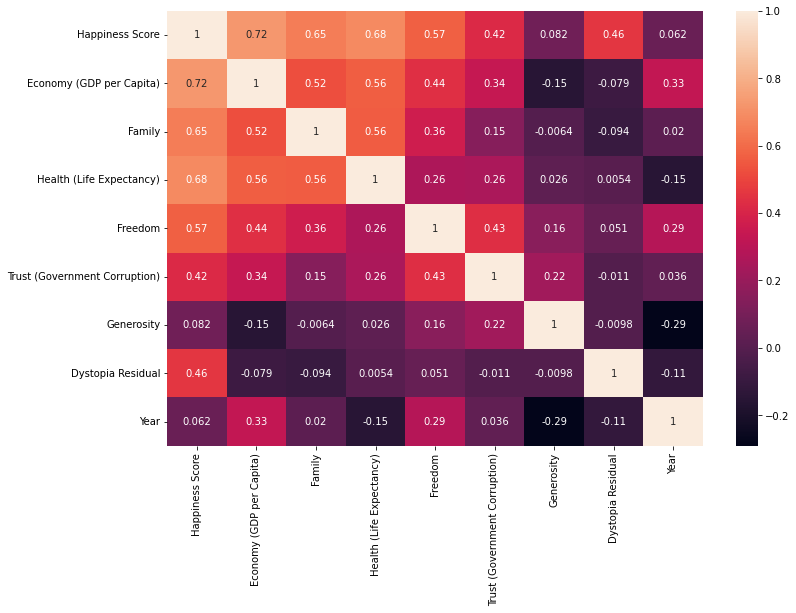

In [276]:
corr = df.drop('Happiness Rank', axis='columns').corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True)

### Economy, Health and Family have the greatest correlation with Happiness Score

### 2. Statistical analysis

#### By year

In [277]:
df.groupby('Year').agg(['mean', 'median', 'std', 'count'])

Happiness Rank                         Happiness Score                    \
               mean median        std count            mean  median       std   
Year                                                                            
2015      79.493671   79.5  45.754363   158        5.375734  5.2325  1.145010   
2016      78.980892   79.0  45.466030   157        5.382185  5.3140  1.141674   
2017      78.000000   78.0  44.888751   155        5.354019  5.2790  1.131230   
2018      78.500000   78.5  45.177428   156        5.375917  5.3780  1.119506   
2019      78.500000   78.5  45.177428   156        5.407096  5.3795  1.113120   
2020      77.000000   77.0  44.311398   153        5.473240  5.5150  1.112270   
2021      75.000000   75.0  43.156691   149        5.532839  5.5340  1.073924   
2022      73.500000   73.5  42.290661   146        5.553575  5.5685  1.086843   
2023      69.000000   69.0  39.692569   137        5.539796  5.6840  1.139929   

           Economy (GDP per Capita)            ...  \
     count                     mean    median  ...   
Year                                           ...   
2015   158                 0.846137  0.910245  ...   
2016   157                 0.953880  1.027800  ...   
2017   155                 0.984718  1.064578  ...   
2018   156                 0.891449  0.949500  ...   
2019   156                 0.905147  0.960000  ...   
2020   153                 0.868771  0.918549  ...   
2021   149                 0.977161  1.025000  ...   
2022   146                 1.410445  1.445500  ...   
2023   137                 1.406985  1.449000  ...   

     Trust (Government Corruption)       Generosity                            \
                               std count       mean    median       std count   
Year                                                                            
2015                      0.120034   158   0.237296  0.216130  0.126685   158   
2016                      0.111038   157   0.242635  0.222450  0.133756   157   
2017                      0.101661   155   0.246883  0.231538  0.134780   155   
2018                      0.096727   156   0.181006  0.174000  0.098471   156   
2019                      0.094538   156   0.184846  0.177500  0.095254   156   
2020                      0.113097   153   0.189375  0.176745  0.100401   153   
2021                      0.114361   149   0.178047  0.164000  0.098270   149   
2022                      0.127514   146   0.147377  0.132500  0.082799   146   
2023                      0.126723   137   0.148474  0.137000  0.076053   137   

     Dystopia Residual                          
                  mean  median       std count  
Year                                            
2015          2.098961  2.0951  0.553561   158  
2016          2.325813  2.2903  0.542192   157  
2017          1.850272  1.8329  0.500004   155  
2018          1.925549  1.9090  0.517325   156  
2019          1.879872  1.9160  0.528859   156  
2020          1.972318  2.0463  0.563639   153  
2021          2.430302  2.5110  0.537576   149  
2022          1.831712  1.8940  0.534885   146  
2023          1.775391  1.8450  0.503369   137  

[9 rows x 36 columns]

Kurtosis 2015: -0.7760749386480148
Skewness 2015: 0.09776909409344678
----------------------------------------------------------------------
Kurtosis 2016: -0.8900096001646514
Skewness 2016: 0.04368210468578225
----------------------------------------------------------------------
Kurtosis 2017: -0.7504186573250236
Skewness 2017: 0.009553789803284486
----------------------------------------------------------------------
Kurtosis 2018: -0.7107973573560815
Skewness 2018: 0.015179588167422637
----------------------------------------------------------------------
Kurtosis 2019: -0.6083753495644775
Skewness 2019: 0.01144994949132211
----------------------------------------------------------------------
Kurtosis 2020: -0.4422363168159422
Skewness 2020: -0.10612402849831491
----------------------------------------------------------------------
Kurtosis 2021: -0.36850162785429363
Skewness 2021: -0.10426853999760208
----------------------------------------------------------------------
Kurtosis

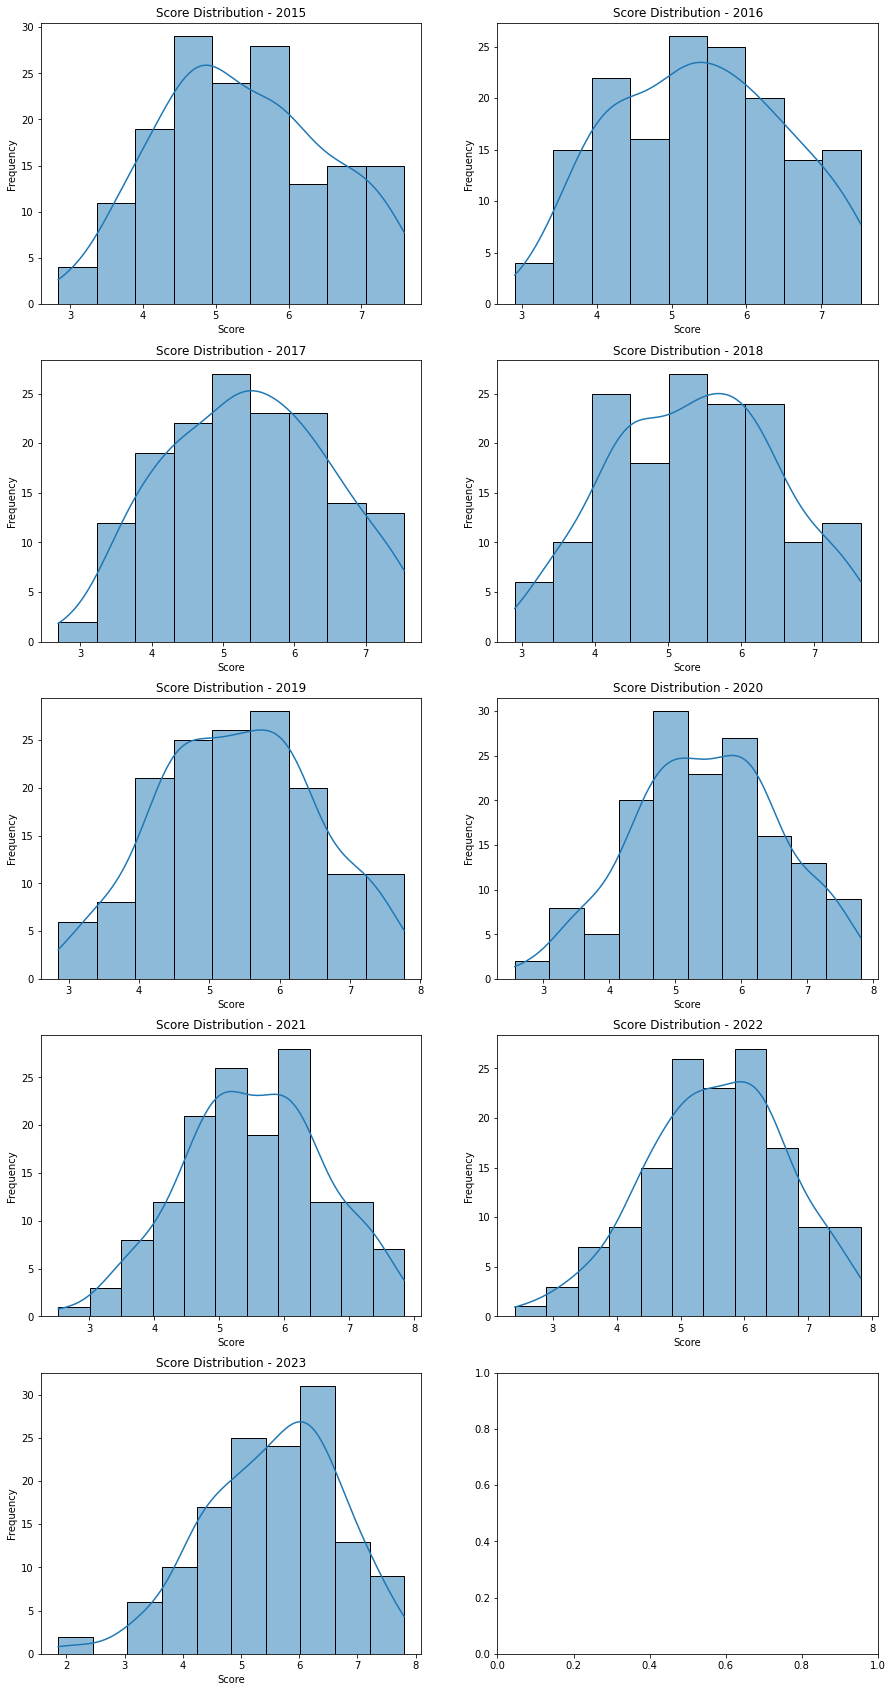

In [297]:
years = [item for item in df['Year'].unique()]
fig, axes = plt.subplots(5, 2, figsize=(15, 30))
axes = axes.flatten()
for year, ax in zip(years, axes):
    ax=sns.histplot(data=df.loc[df.Year==year], x='Happiness Score', palette='magma', kde=True, ax=ax)
    ax.set_title(f'Score Distribution - {year}')
    ax.set_xlabel('Score')
    ax.set_ylabel('Frequency')
    print(f"Kurtosis {year}: {df.loc[df.Year==year, 'Happiness Score'].kurtosis()}")
    print(f"Skewness {year}: {df.loc[df.Year==year, 'Happiness Score'].skew()}")
    print('-'*70)

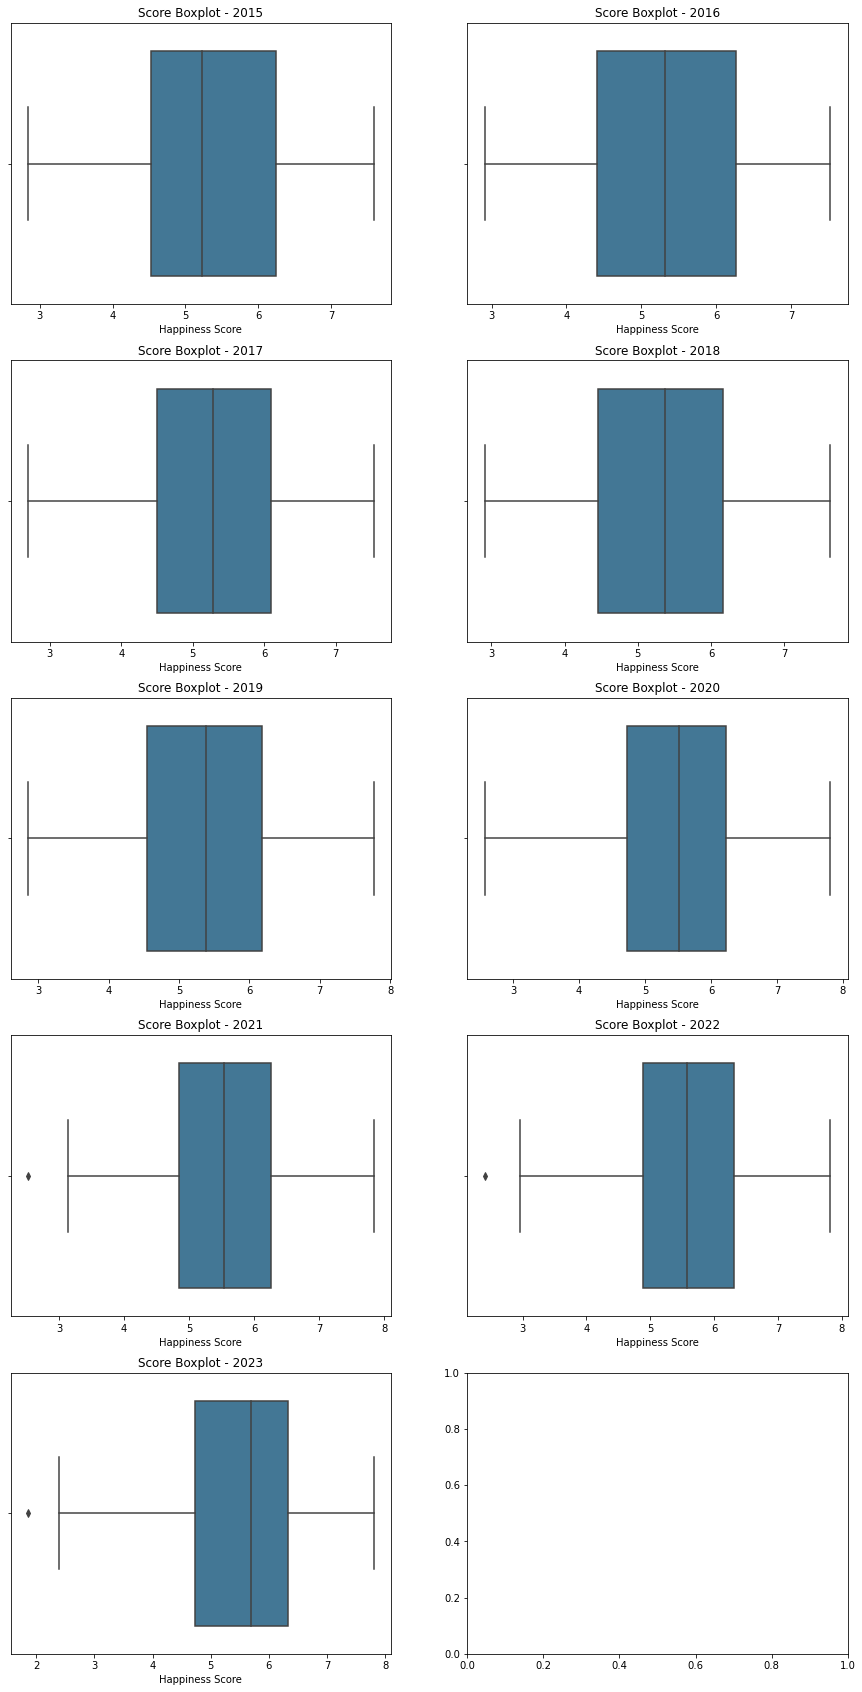

In [279]:
fig, axes = plt.subplots(5, 2, figsize=(15, 30))
axes = axes.flatten()
for year, ax in zip(years, axes):
    ax=sns.boxplot(data=df.loc[df.Year==year, :], x='Happiness Score', palette='mako', ax=ax) 
    ax.set_title(f'Score Boxplot - {year}')

In [280]:
pd.DataFrame(df['Happiness Score'].describe())

,Happiness Score
count,1367.000000
mean,5.441086
std,1.117909
min,1.859000
25%,4.599500
50%,5.440000
75%,6.256300
max,7.842000


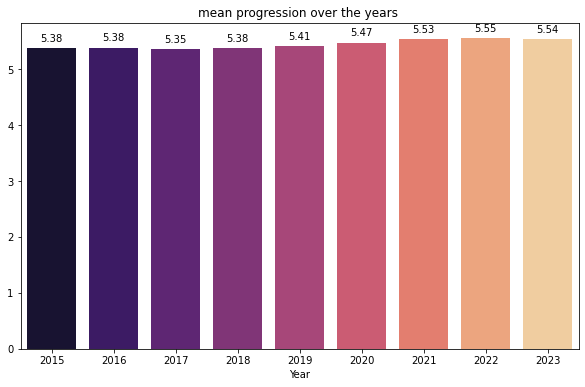

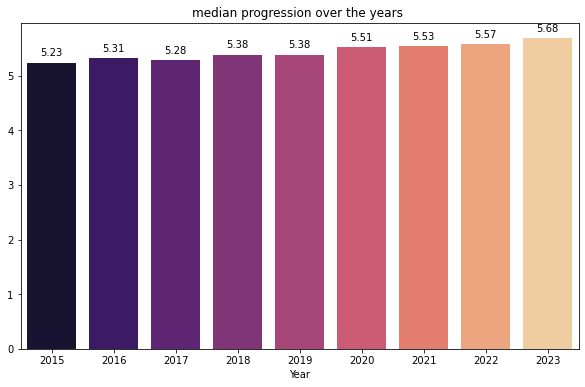

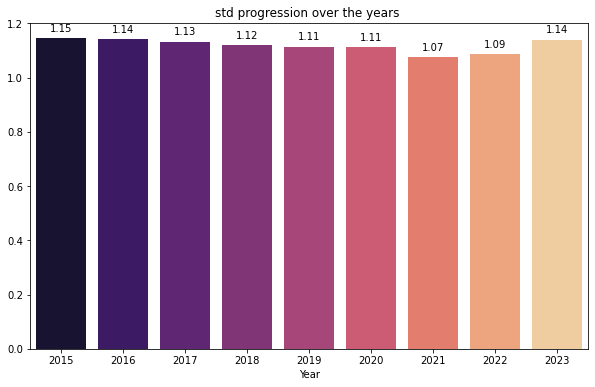

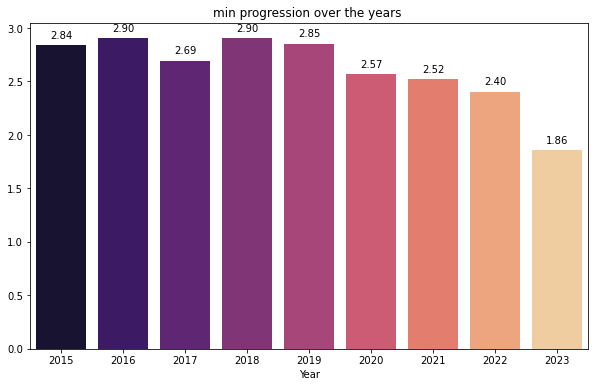

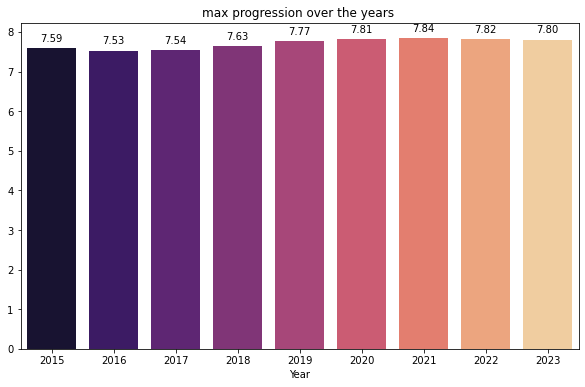

In [281]:
for item in ['mean', 'median', 'std', 'min', 'max']:
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x=df.groupby('Year')['Happiness Score'].agg(item).index,
                y=df.groupby('Year')['Happiness Score'].agg(item).values,
                palette = 'magma')
    add_value_labels(ax)
    plt.title(f'{item} progression over the years ')

Text(0.5, 1.0, 'Inequality progression over the years ')

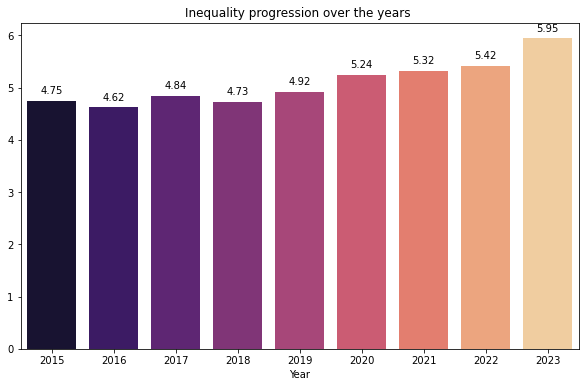

In [282]:
amp = df.groupby('Year')['Happiness Score'].agg(max) - df.groupby('Year')['Happiness Score'].agg(min)
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=amp.index,
            y=amp.values,
            palette = 'magma')
add_value_labels(ax)
plt.title(f'Inequality progression over the years ')

### By Region

In [283]:
df_region = df.groupby('Region').agg(['mean', 'median', 'std', 'count'])
df_region

Happiness Rank                          \
                                          mean median        std count   
Region                                                                   
Australia and New Zealand             9.705882   10.0   1.490164    17   
Central and Eastern Europe           69.756972   68.0  26.897597   251   
Eastern Asia                         65.363636   62.0  20.150701    44   
Latin America and Caribbean          52.176796   46.0  27.979193   181   
Middle East and Northern Africa      83.715190   92.5  41.895851   158   
North America                        12.823529   14.0   4.612961    17   
Southeastern Asia                    80.062500   81.5  32.459261    80   
Southern Asia                       113.758621  115.5  23.694925    58   
Sub-Saharan Africa                  123.896774  128.0  21.728145   310   
Western Europe                       23.771739   16.0  23.830734   184   

                                Happiness Score                          \
                                           mean  median       std count   
Region                                                                    
Australia and New Zealand              7.253435  7.2840  0.072688    17   
Central and Eastern Europe             5.590072  5.6330  0.593020   251   
Eastern Asia                           5.691189  5.8365  0.428407    44   
Latin America and Caribbean            5.983997  6.0860  0.663513   181   
Middle East and Northern Africa        5.263156  5.1304  1.039307   158   
North America                          7.108982  7.1030  0.187409    17   
Southeastern Asia                      5.370429  5.3420  0.728269    80   
Southern Asia                          4.450198  4.5150  0.815979    58   
Sub-Saharan Africa                     4.275568  4.2900  0.631165   310   
Western Europe                         6.829302  6.9710  0.693626   184   

                                Economy (GDP per Capita)            ...  \
                                                    mean    median  ...   
Region                                                              ...   
Australia and New Zealand                       1.447570  1.372000  ...   
Central and Eastern Europe                      1.130310  1.127000  ...   
Eastern Asia                                    1.285727  1.314000  ...   
Latin America and Caribbean                     1.007744  1.015000  ...   
Middle East and Northern Africa                 1.149652  1.102257  ...   
North America                                   1.507236  1.440150  ...   
Southeastern Asia                               1.015817  0.960450  ...   
Southern Asia                                   0.710926  0.704580  ...   
Sub-Saharan Africa                              0.540226  0.483655  ...   
Western Europe                                  1.489289  1.408490  ...   

                                Generosity       Dystopia Residual           \
                                       std count              mean   median   
Region                                                                        
Australia and New Zealand         0.093615    17          2.202776  2.12980   
Central and Eastern Europe        0.087699   251          1.969715  1.91900   
Eastern Asia                      0.107446    44          1.703041  1.72470   
Latin America and Caribbean       0.089634   181          2.417054  2.40300   
Middle East and Northern Africa   0.102106   158          1.846844  1.81130   
North America                     0.085807    17          2.328665  2.26600   
Southeastern Asia                 0.173608    80          1.638189  1.64225   
Southern Asia                     0.104454    58          1.760803  1.81075   
Sub-Saharan Africa                0.073767   310          1.985798  2.01235   
Western Europe                    0.122295   184          2.167062  2.14980   

                                                        Year          \
                 

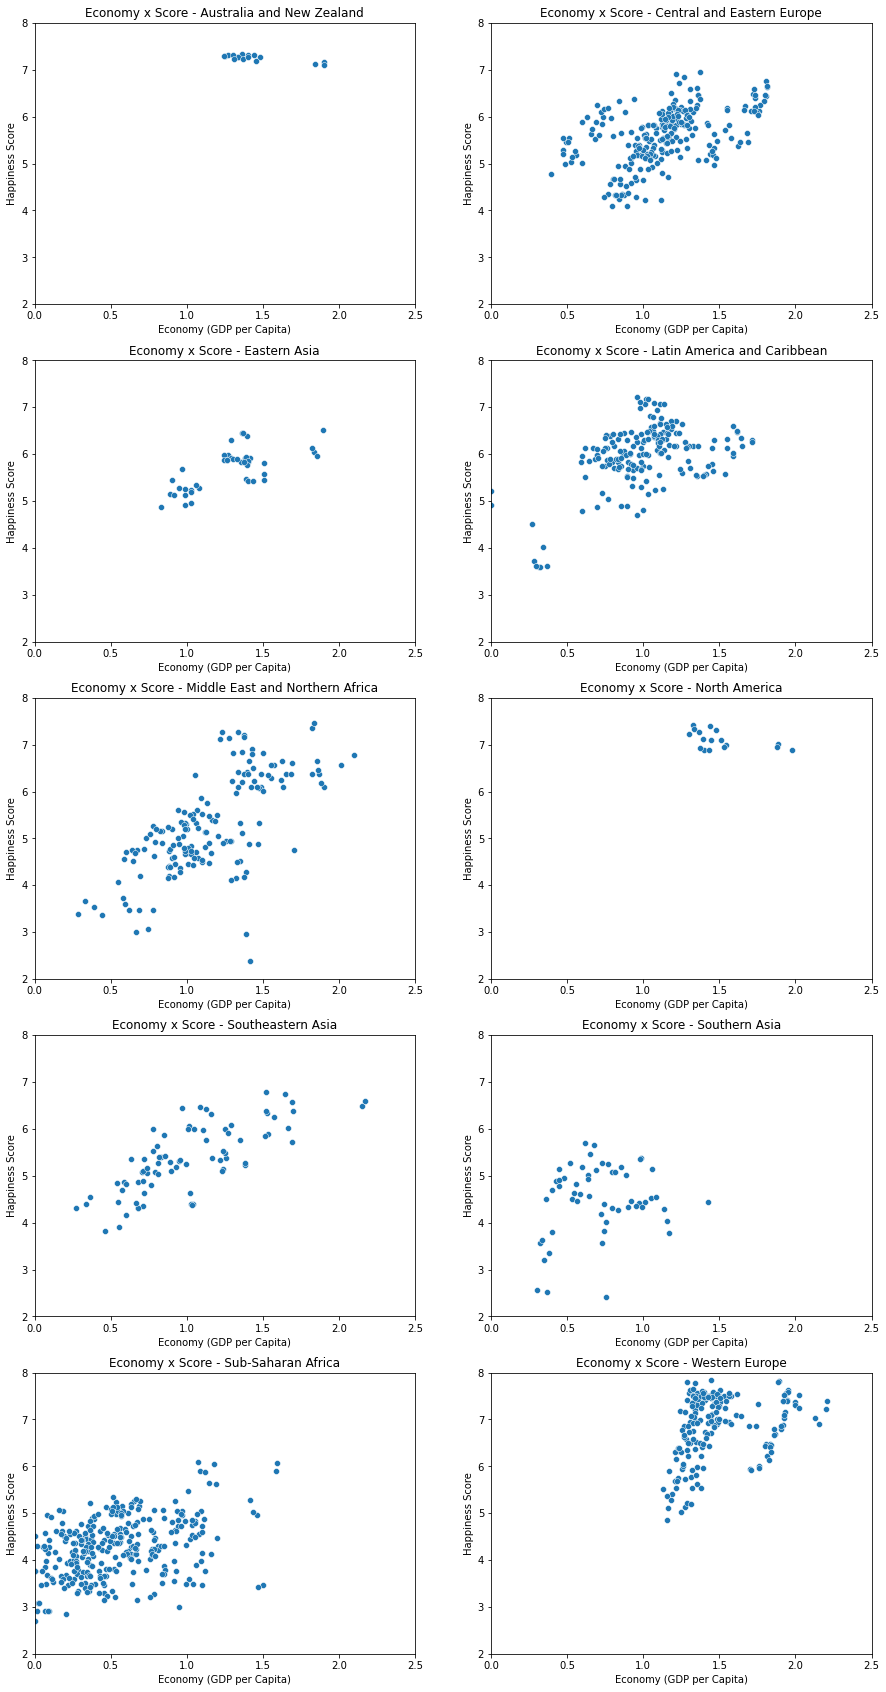

In [298]:
items = [item for item in df_region.index]
fig, axes = plt.subplots(5, 2, figsize=(15, 30))
axes = axes.flatten()
for item, ax in zip(items, axes):
    ax=sns.scatterplot(data=df.loc[df.Region==item, :], x='Economy (GDP per Capita)', y='Happiness Score', ax=ax) 
    ax.set_title(f'Economy x Score - {item}')
    ax.set_xlim(0, 2.5)
    ax.set_ylim(2, 8)

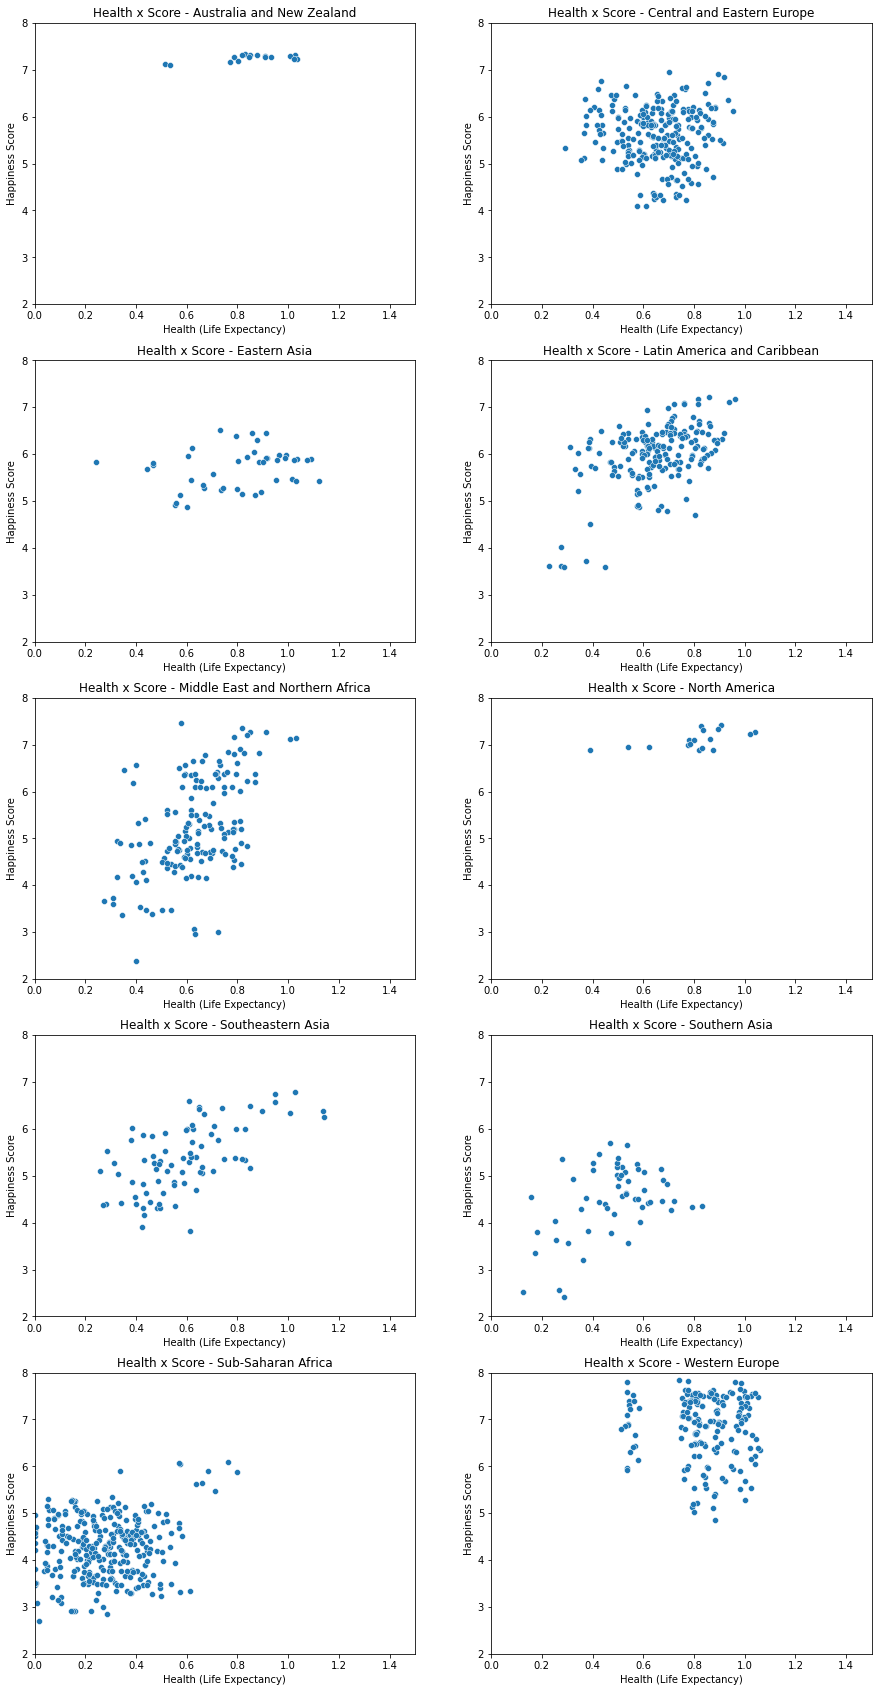

In [299]:
items = [item for item in df_region.index]
fig, axes = plt.subplots(5, 2, figsize=(15, 30))
axes = axes.flatten()
for item, ax in zip(items, axes):
    ax=sns.scatterplot(data=df.loc[df.Region==item, :], x='Health (Life Expectancy)', y='Happiness Score', ax=ax) 
    ax.set_title(f'Health x Score - {item}')
    ax.set_xlim(0, 1.5)
    ax.set_ylim(2, 8)

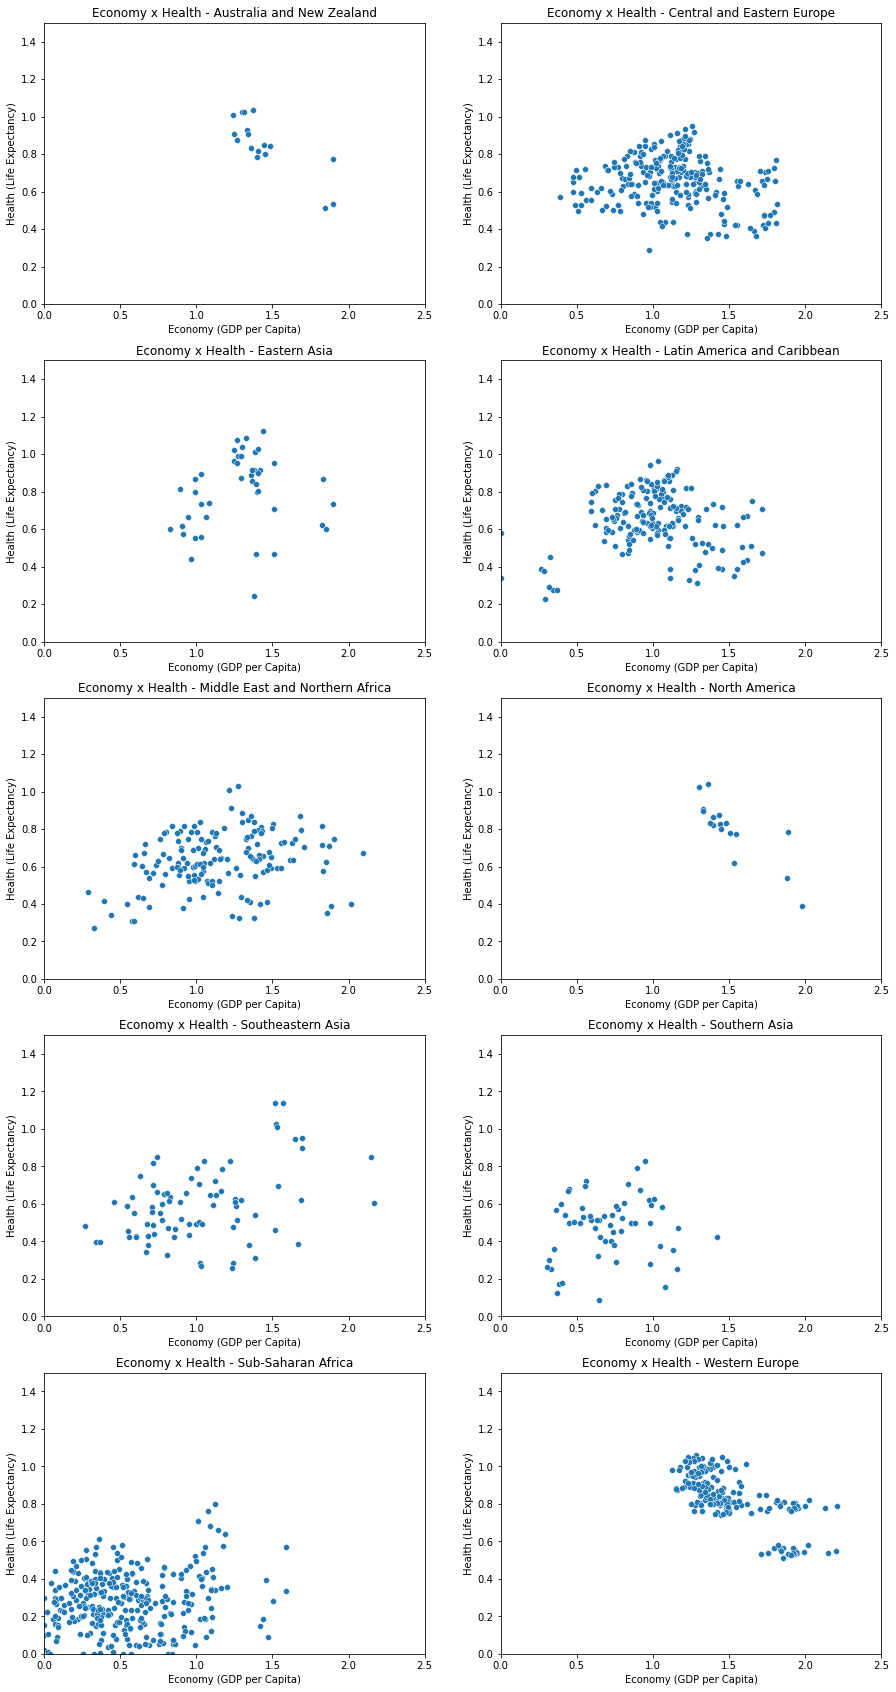

In [300]:
items = [item for item in df_region.index]
fig, axes = plt.subplots(5, 2, figsize=(15, 30))
axes = axes.flatten()
for item, ax in zip(items, axes):
    ax=sns.scatterplot(data=df.loc[df.Region==item, :], x='Economy (GDP per Capita)', y='Health (Life Expectancy)', ax=ax) 
    ax.set_title(f'Economy x Health - {item}')
    ax.set_xlim(0, 2.5)
    ax.set_ylim(0, 1.5)

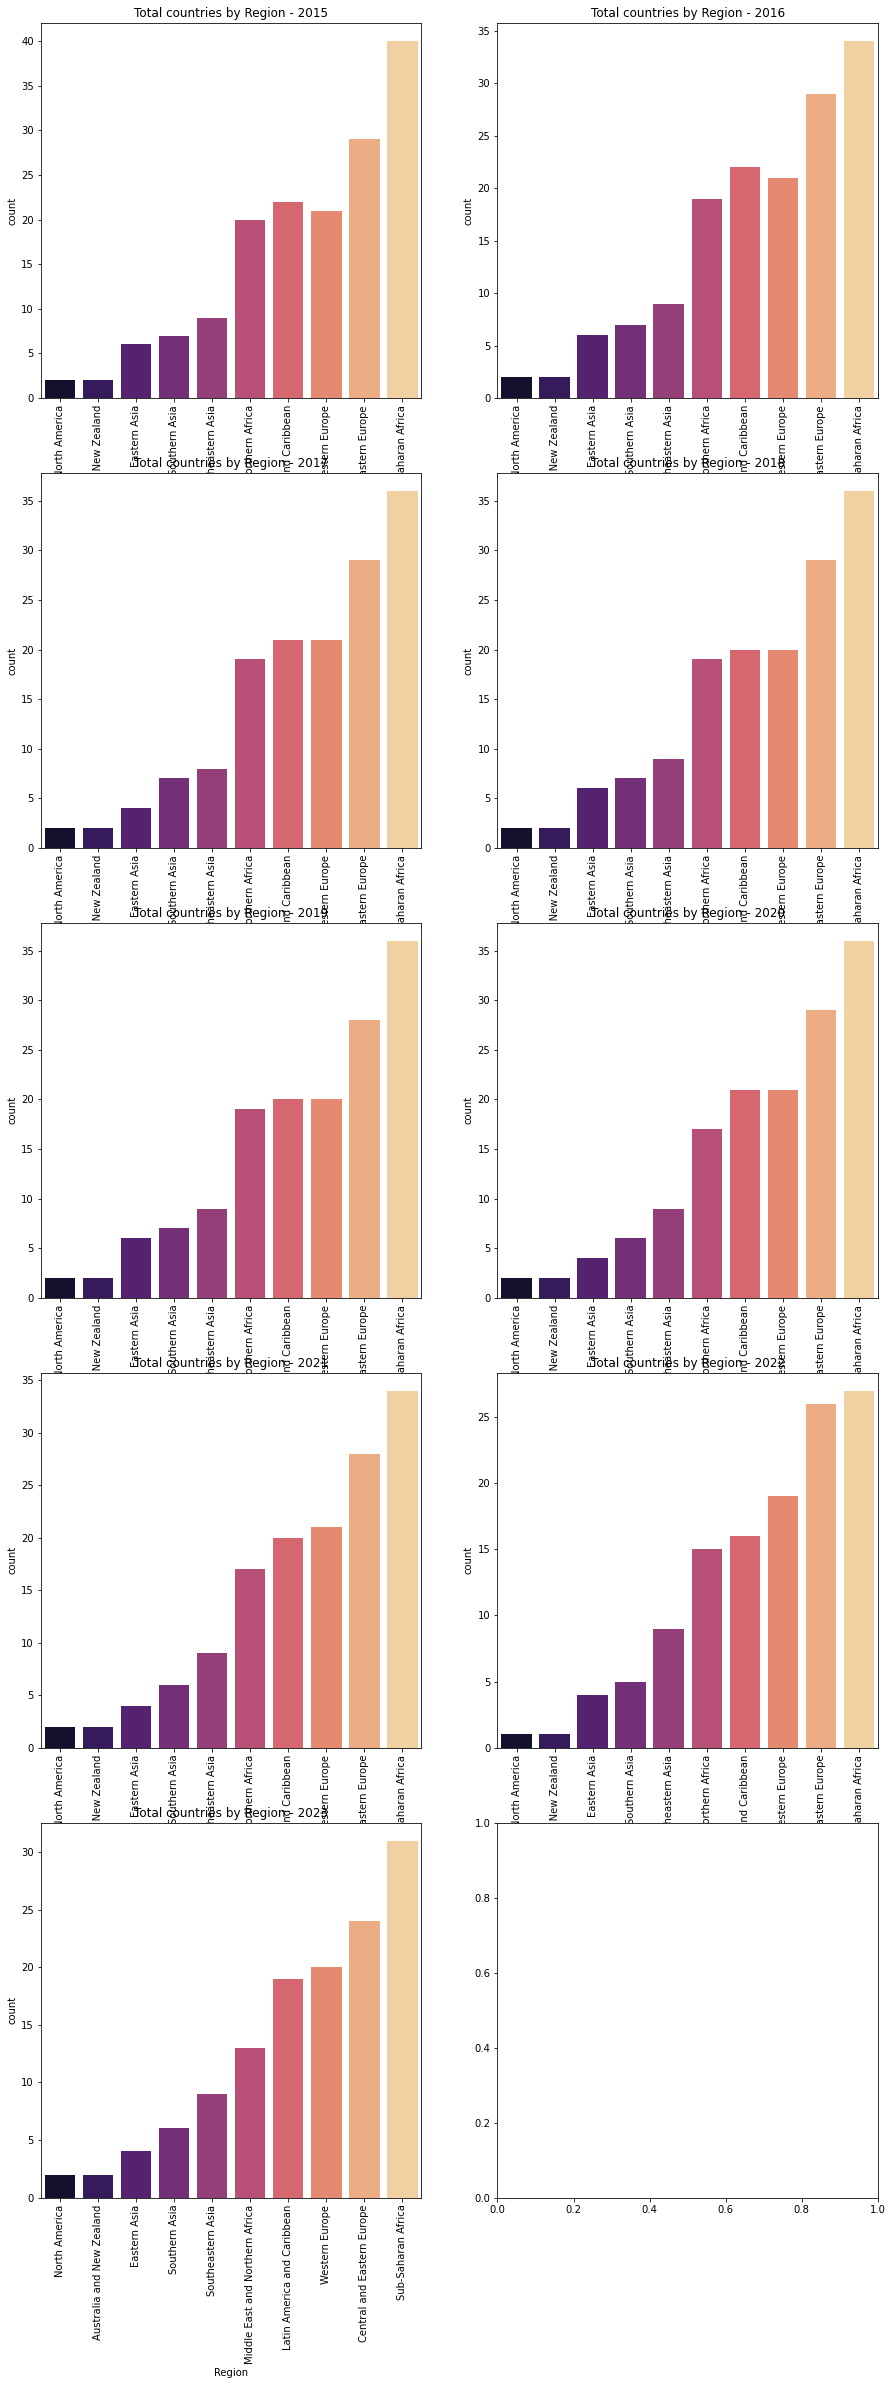

In [287]:
fig, axes = plt.subplots(5, 2, figsize=(15, 40))
axes = axes.flatten()
for year, ax in zip(years, axes):
    ax=sns.countplot(data=df.loc[df.Year==year, :], x='Region', order=df.Region.value_counts(ascending=True).index, palette='magma', ax=ax)
    ax.set_title(f'Total countries by Region - {year}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    fig.align_xlabels()

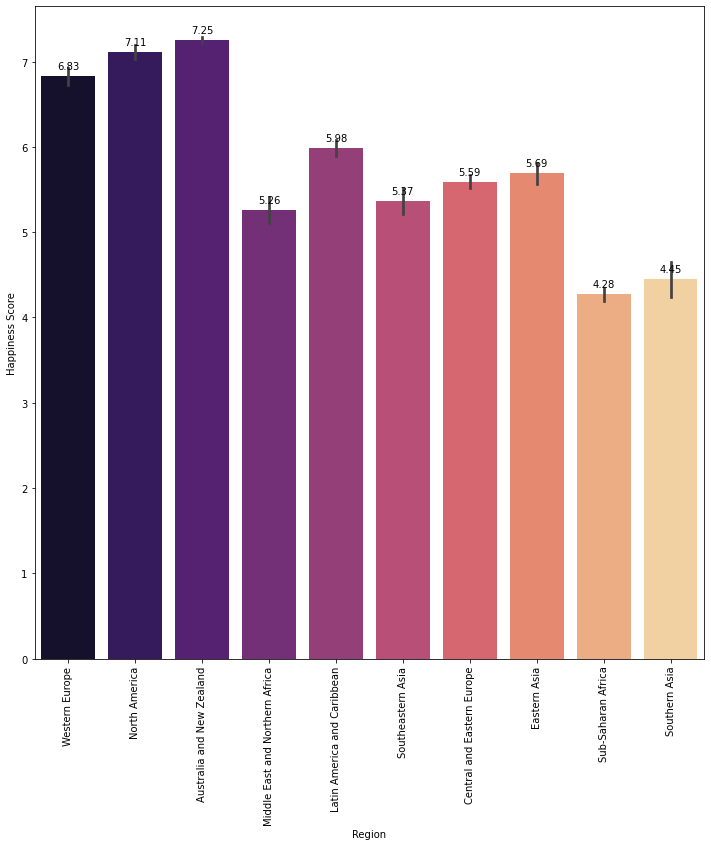

In [288]:
fix, ax = plt.subplots(figsize=(12, 12))
sns.barplot(data=df, x='Region', y='Happiness Score', palette='magma')
add_value_labels(ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
fig.align_xlabels()

### 3. Economy Influence

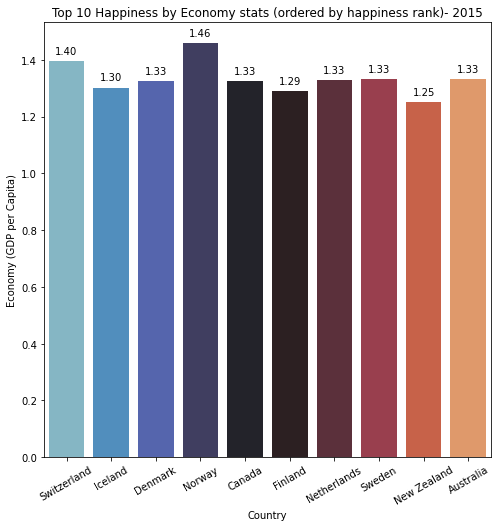

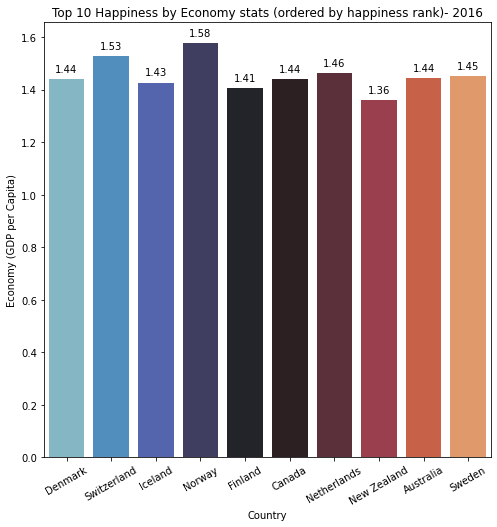

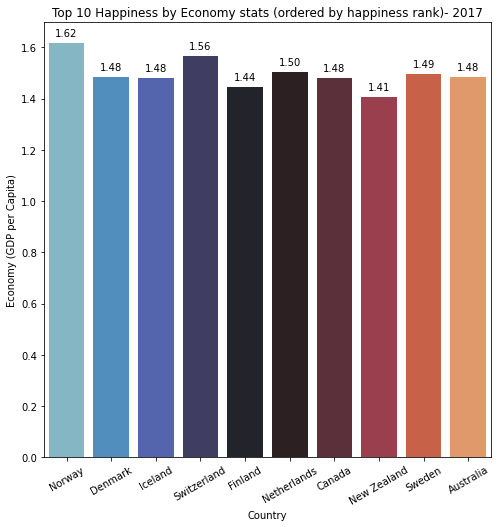

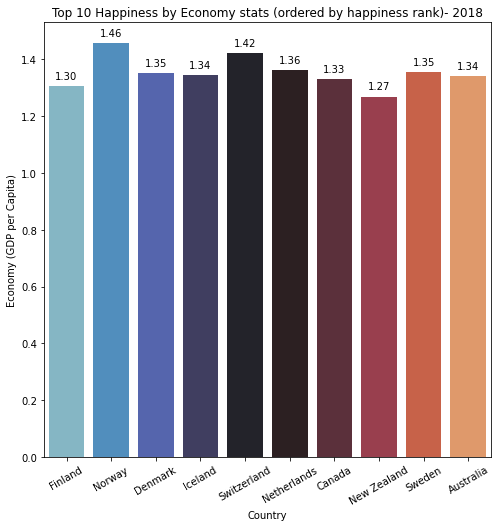

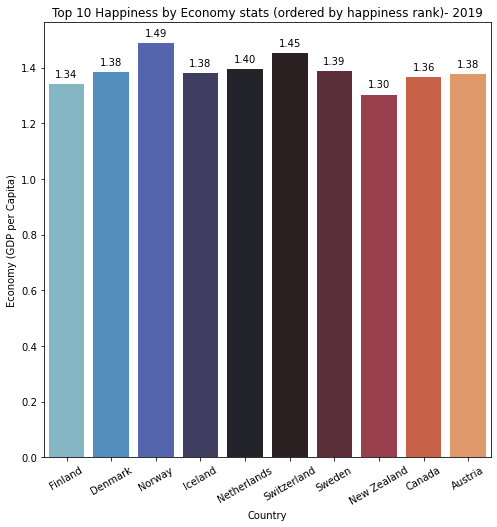

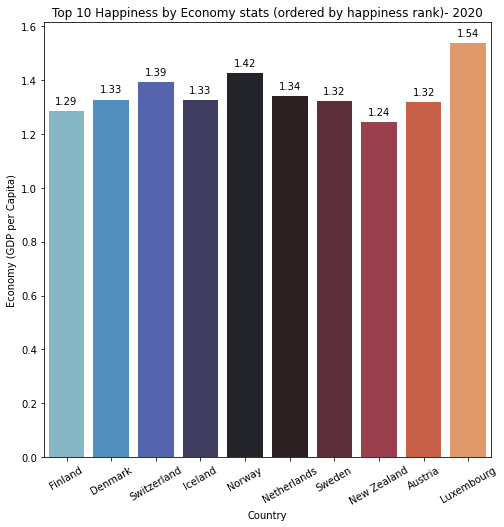

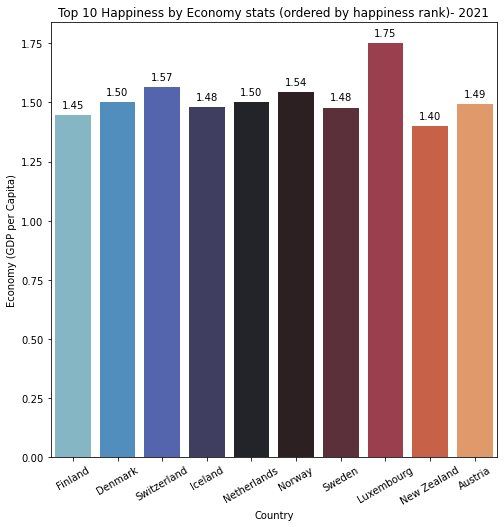

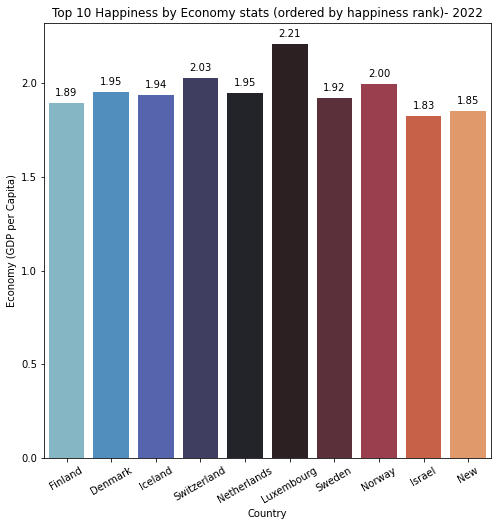

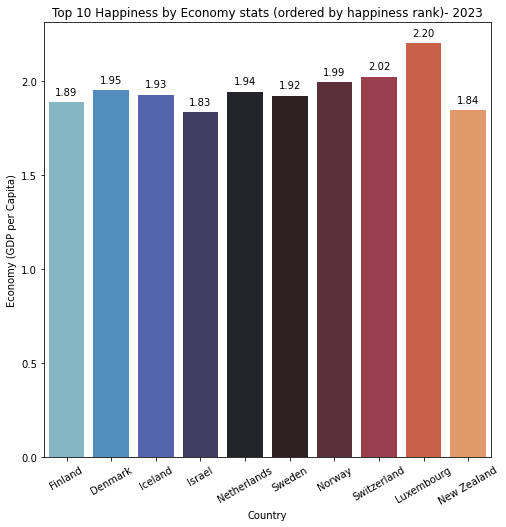

In [289]:
for year in df.Year.unique():
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.barplot(x=df.loc[df.Year==year, :]['Country'][0:10], y=df.loc[df.Year==year, :]['Economy (GDP per Capita)'][0:10], palette='icefire')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
    plt.title(f'Top 10 Happiness by Economy stats (ordered by happiness rank)- {year}')
    add_value_labels(ax)
    plt.show()

### 4. Evolution through the years

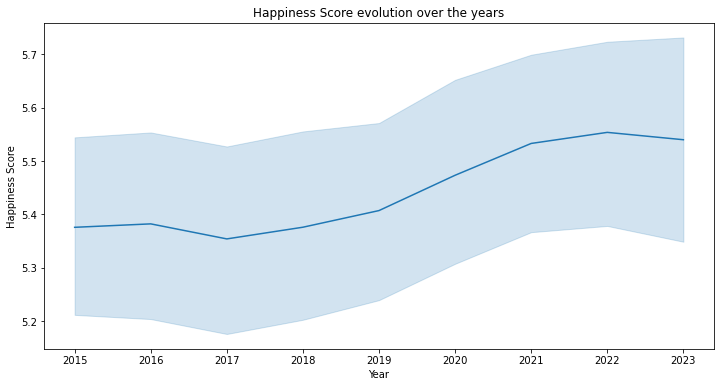

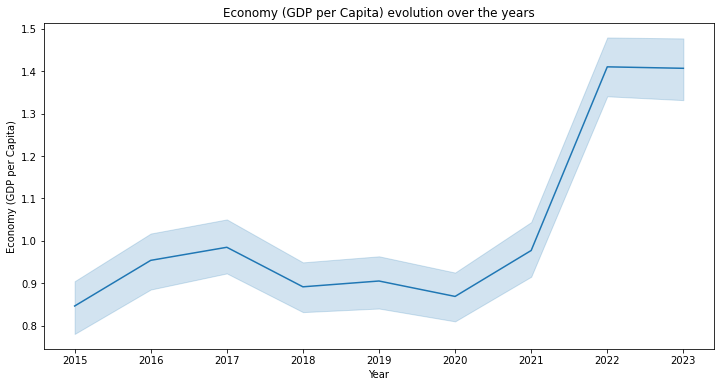

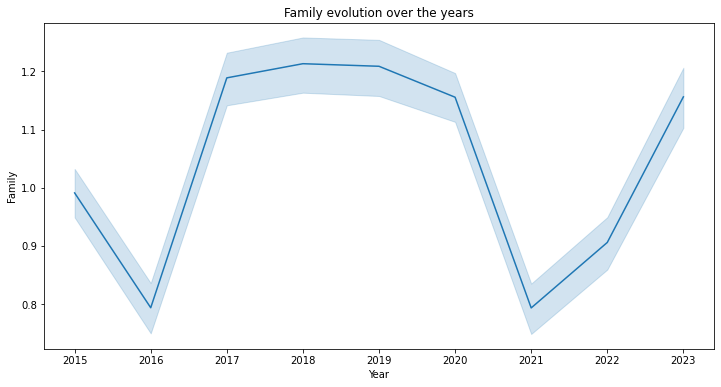

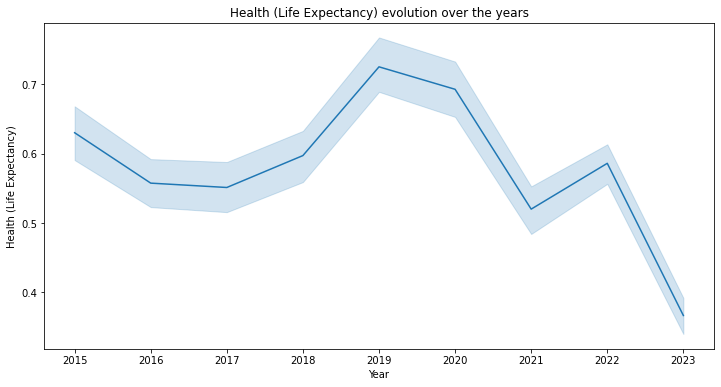

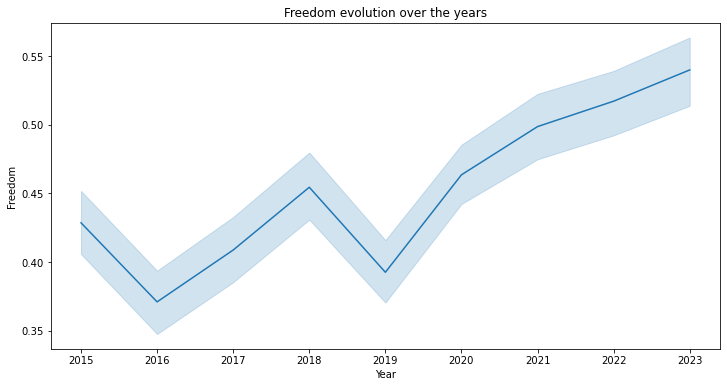

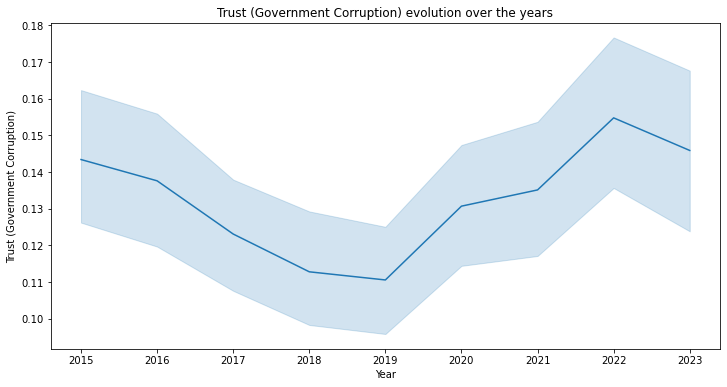

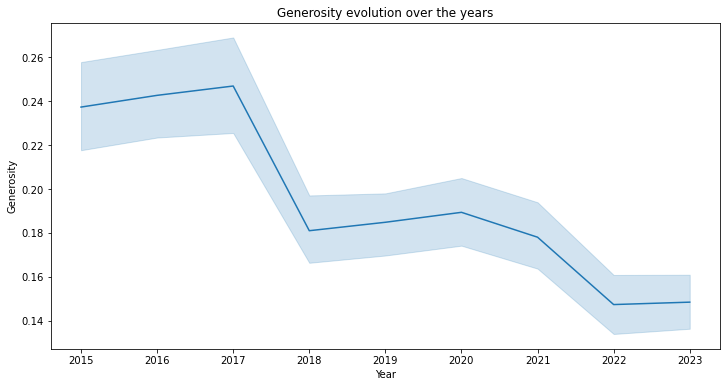

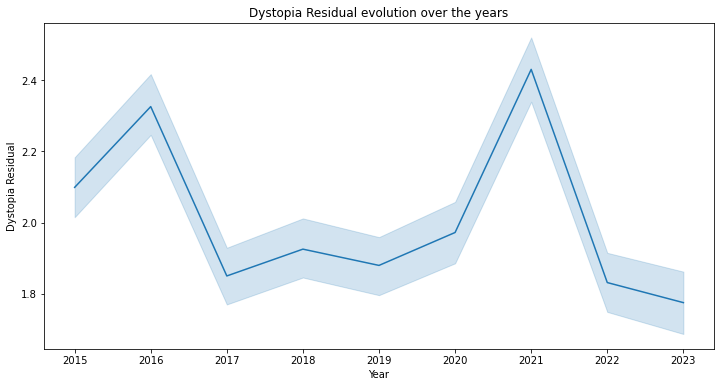

In [290]:
for item in df.columns[2:-2]:
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.lineplot(x=df.Year, y=df[item])
    plt.title(f'{item} evolution over the years')
    plt.xticks([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

### 5. Country data

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        1367 non-null   object 
 1   Happiness Rank                 1367 non-null   int64  
 2   Happiness Score                1367 non-null   float64
 3   Economy (GDP per Capita)       1367 non-null   float64
 4   Family                         1367 non-null   float64
 5   Health (Life Expectancy)       1367 non-null   float64
 6   Freedom                        1367 non-null   float64
 7   Trust (Government Corruption)  1367 non-null   float64
 8   Generosity                     1367 non-null   float64
 9   Dystopia Residual              1367 non-null   float64
 10  Year                           1367 non-null   int64  
 11  Region                         1300 non-null   object 
dtypes: float64(8), int64(2), object(2)
memory usage:

In [292]:
def horizontal_bar(df, country):
    df = df.loc[df.Country == country, :]
    fig, ax = plt.subplots(figsize=(15, 8))
    bar_df = df.set_index('Year').iloc[:, 3:9]
    bar_df.plot.barh(stacked=True, edgecolor='none', ax=ax)
    horiz_offset = 1.03
    vert_offset = 1.
    ax.legend(bbox_to_anchor=(horiz_offset, vert_offset)) 
    plt.title(f'Variables impact on Score - {country}')
    
def country_data(df, country):
    df = df.loc[df.Country == country, :]
    minval = df.loc[df.Country == country, :]['Happiness Rank'].min() - 5
    maxval = df.loc[df.Country == country, :]['Happiness Rank'].max() + 5
    for item in df.columns[1:-2]:
        if item != 'Happiness Rank':
            fig, ax = plt.subplots(figsize=(15, 8))
            sns.lineplot(x=df.Year, y=df[item])
            plt.title(f'{item} evolution over the years - {country}')
            plt.xticks([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])
            add_value_labels(ax)
            plt.show()
        else:
            fig, ax = plt.subplots(figsize=(15, 8))
            sns.lineplot(x=df.Year, y=df[item])
            plt.title(f'{item} evolution over the years - {country}')
            plt.ylim(maxval, minval)
            plt.xticks([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])
            plt.show()
            
    horizontal_bar(df, country)

def compare_country(df, country):
    df = df.loc[df.Country.isin(country), :]
    minval = df.loc[df.Country.isin(country), :]['Happiness Rank'].min() - 10
    maxval = df.loc[df.Country.isin(country), :]['Happiness Rank'].max() + 10
    for item in df.columns[1:-2]:
        if item != 'Happiness Rank':
            fig, ax = plt.subplots(figsize=(15, 8))
            sns.lineplot(x=df.Year, y=df[item], hue=df.Country, palette='Pastel2')
            plt.title(f'{item} evolution over the years - {country}')
            plt.xticks([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])
            plt.show()
        else:
            fig, ax = plt.subplots(figsize=(15, 8))
            sns.lineplot(x=df.Year, y=df[item], hue=df.Country, palette='Pastel2')
            plt.title(f'{item} evolution over the years - {country}')
            plt.ylim(maxval, minval)
            plt.xticks([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])
            plt.show()     
    for item in country:
        horizontal_bar(df, item)

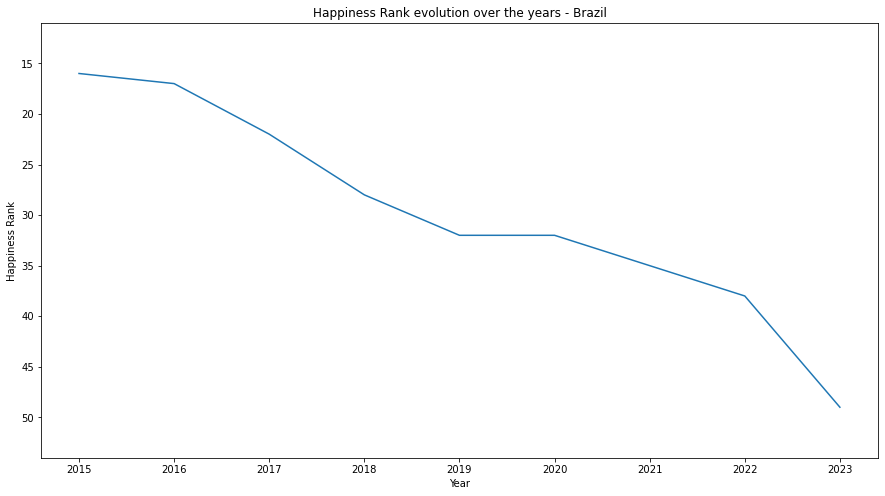

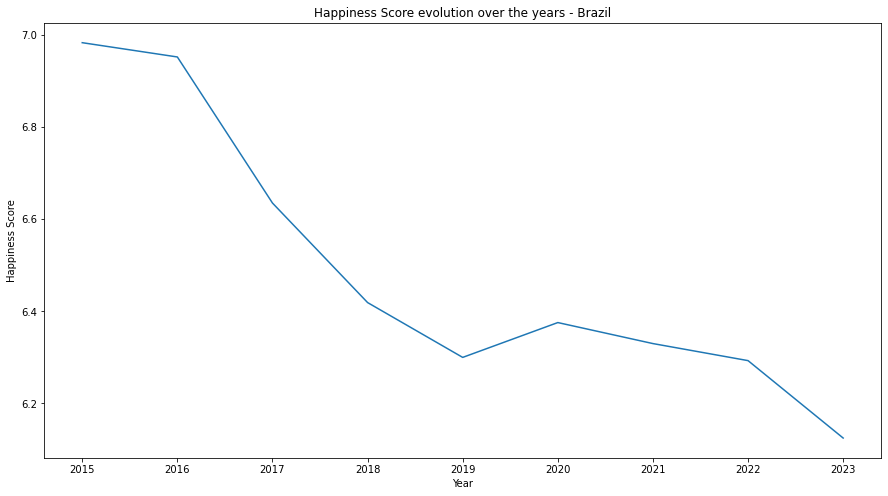

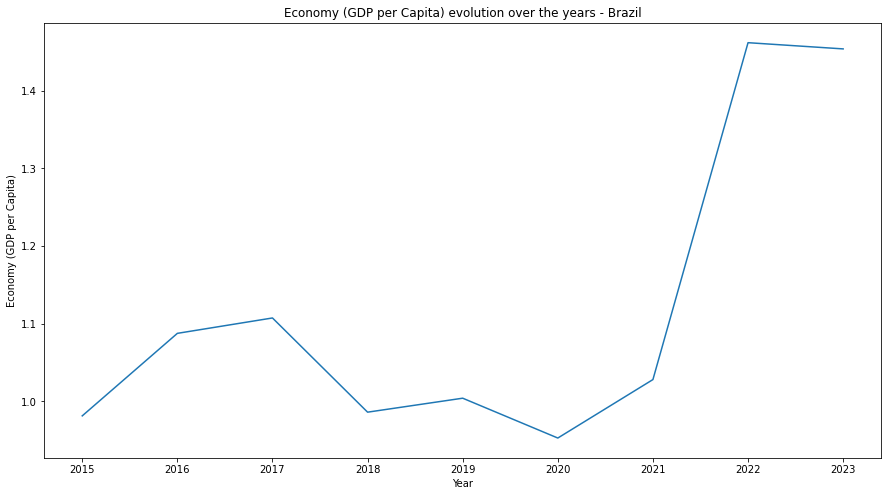

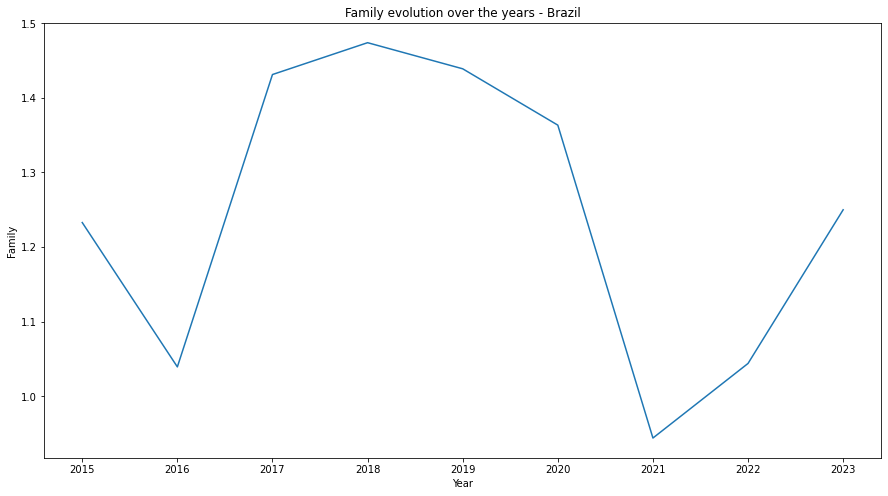

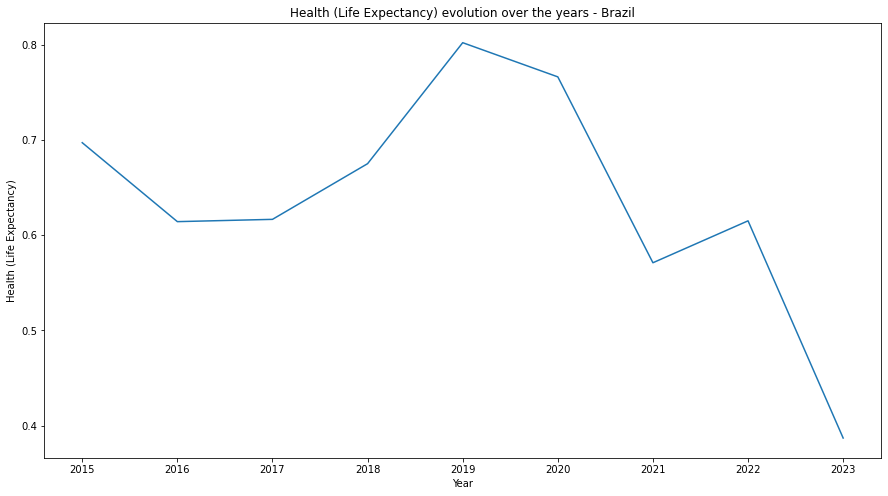

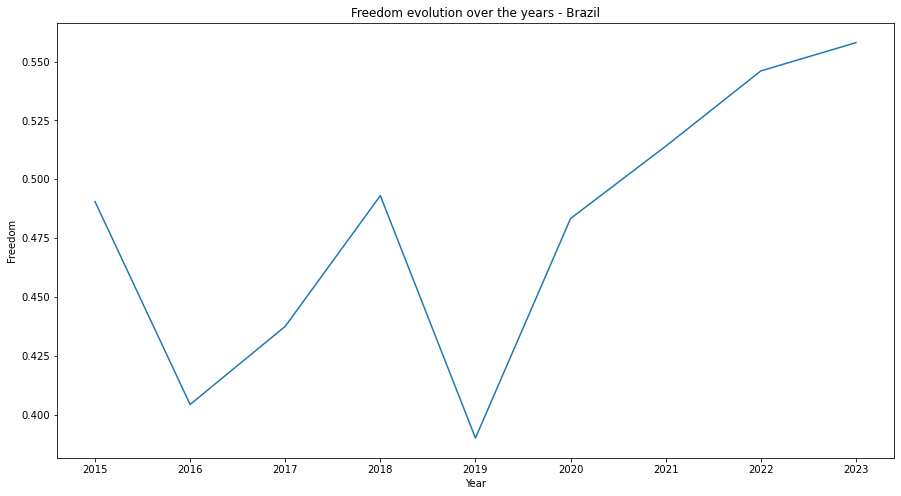

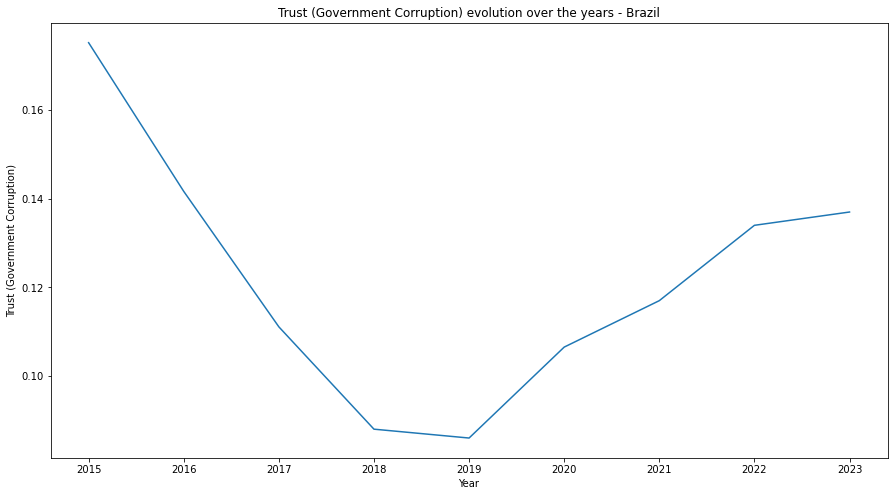

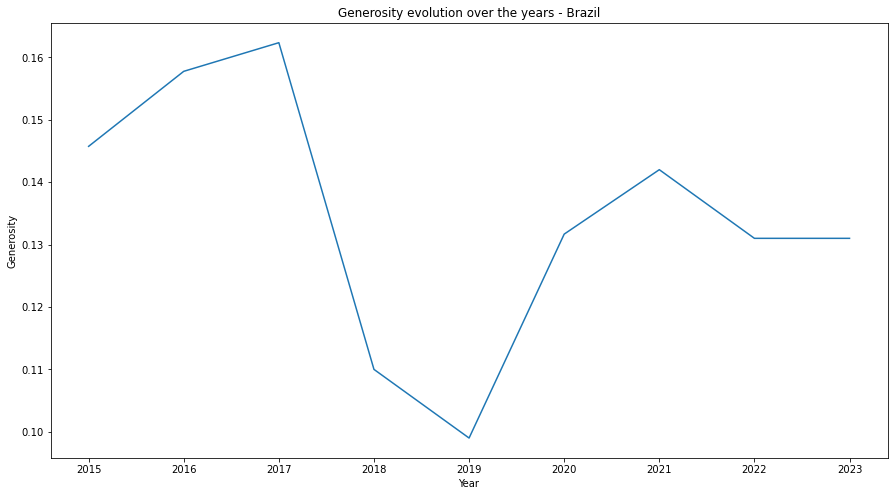

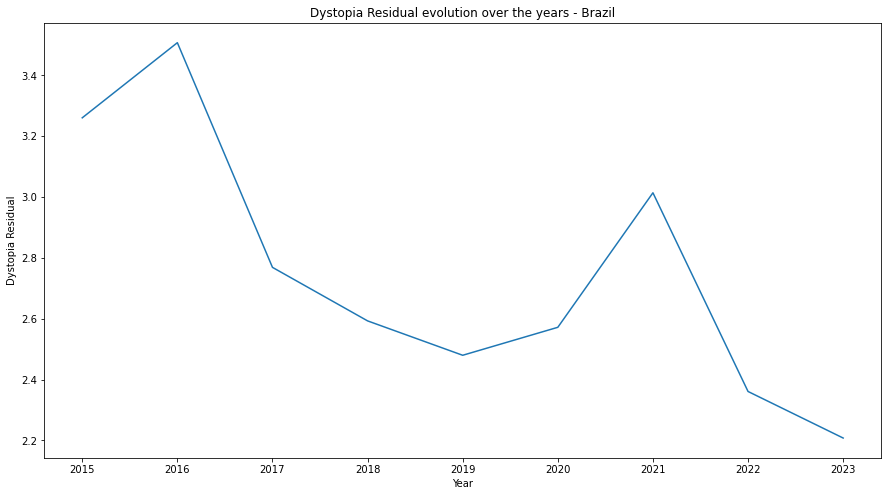

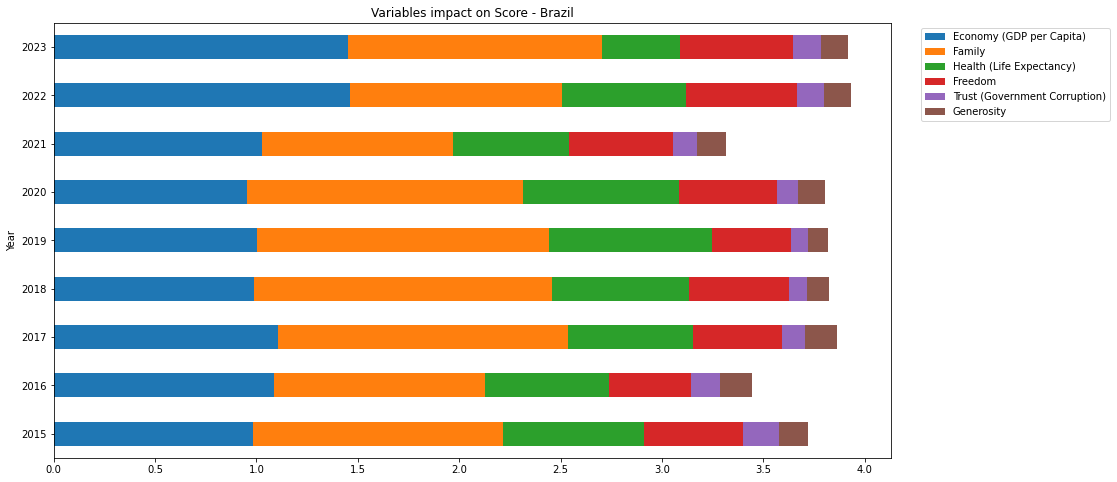

In [293]:
country_data(df, 'Brazil')

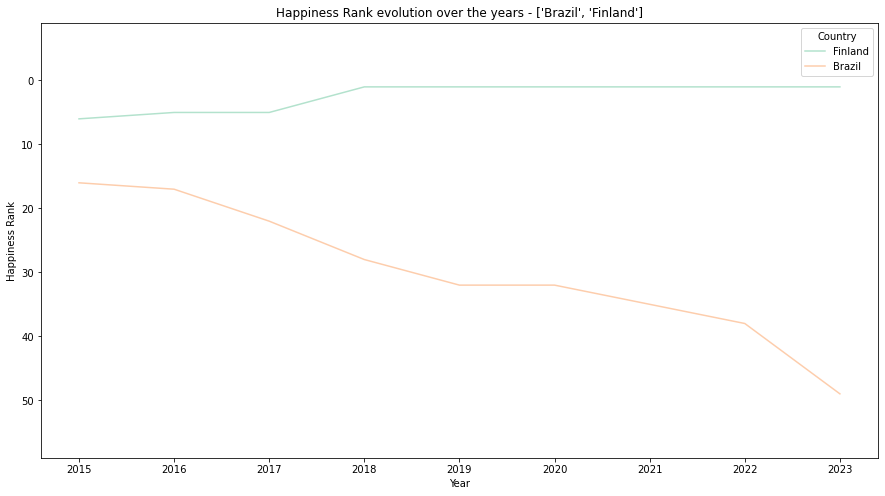

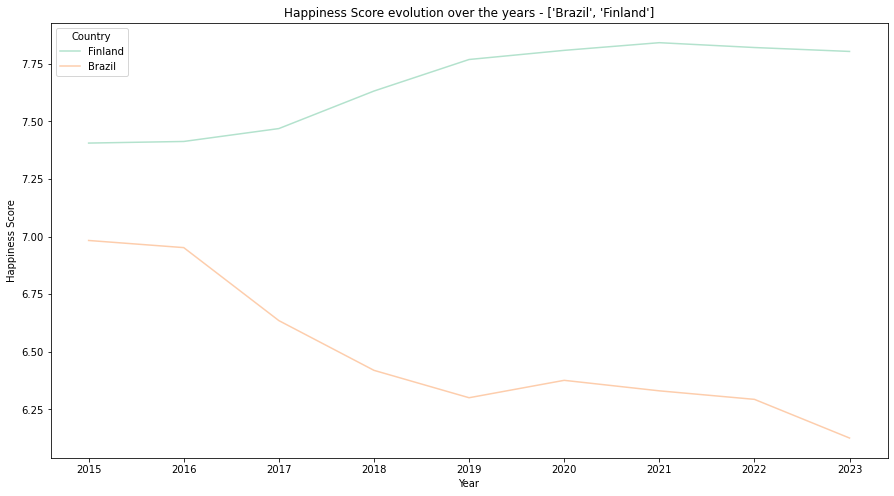

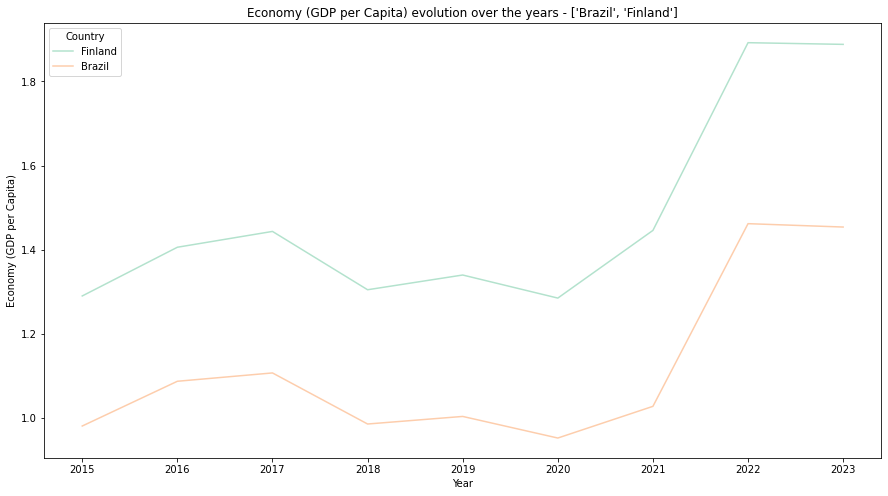

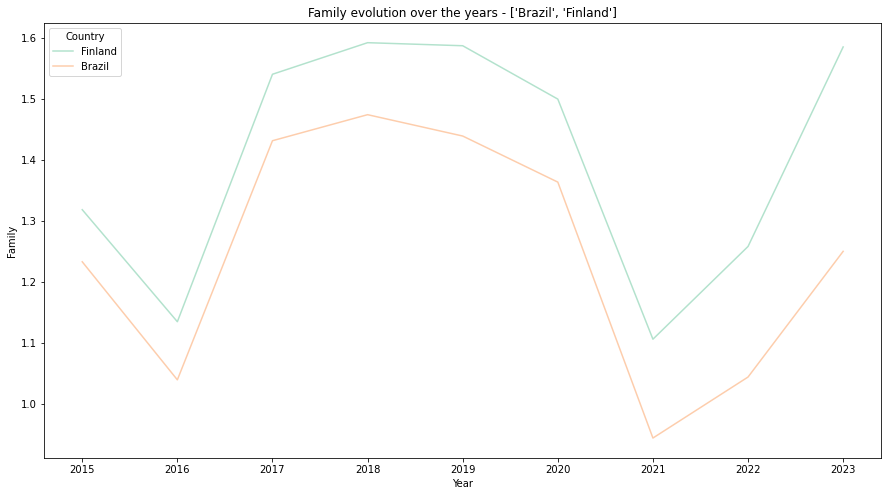

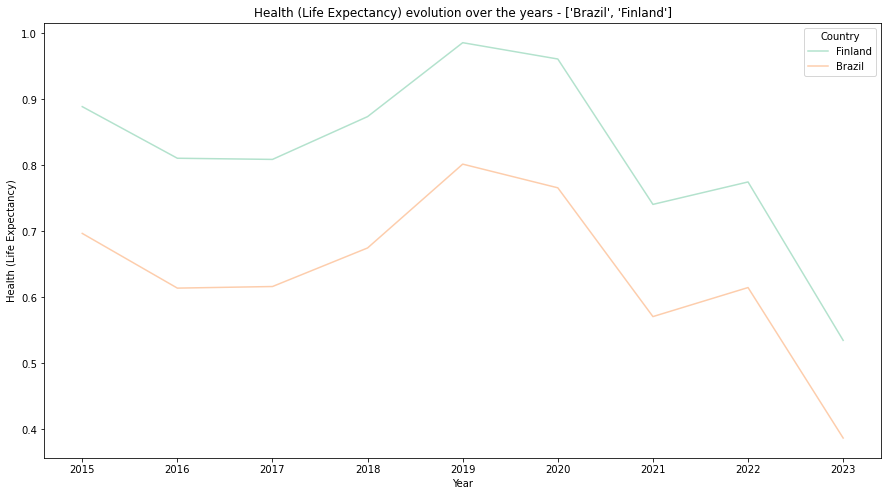

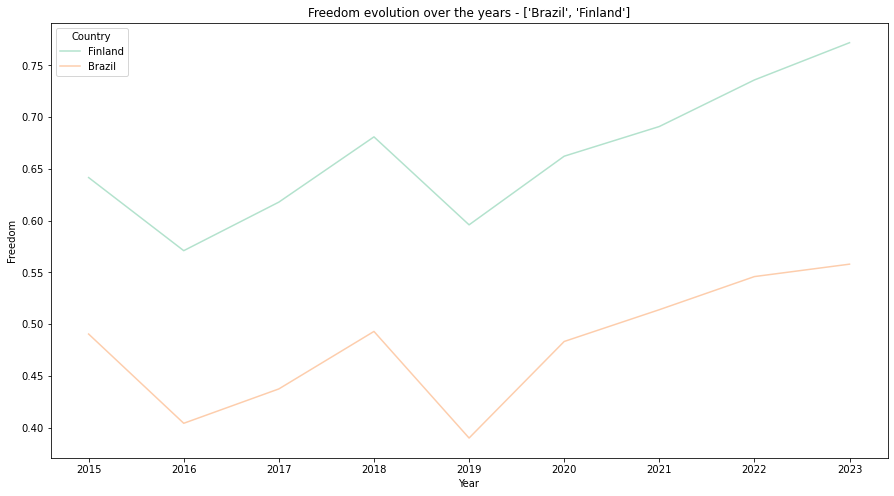

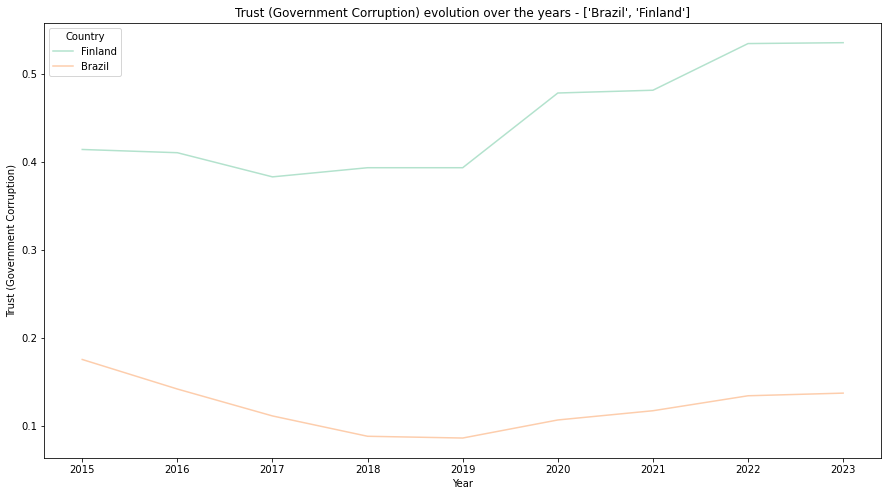

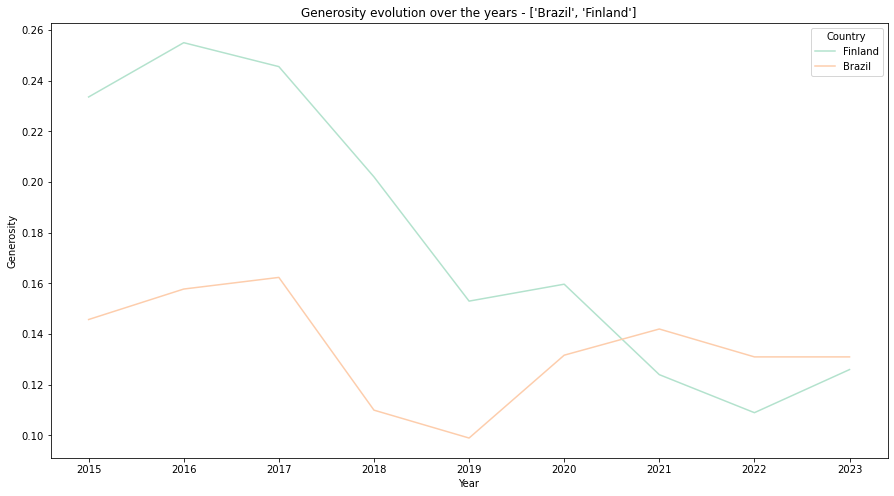

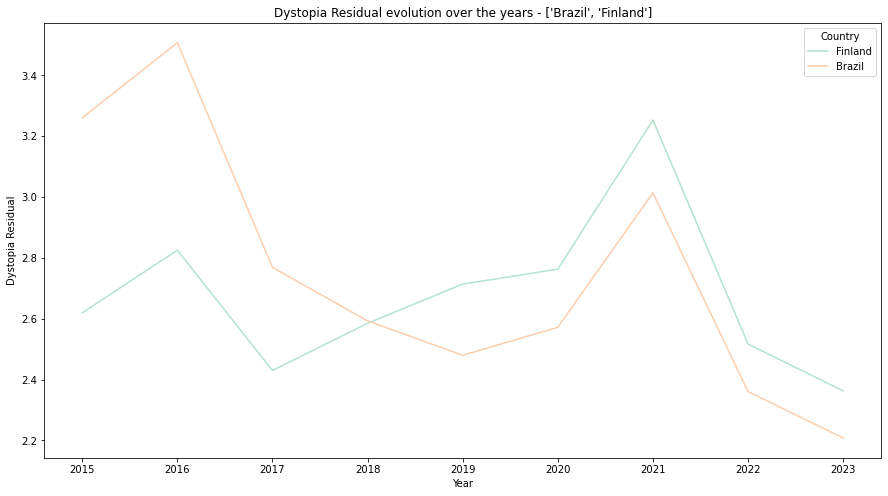

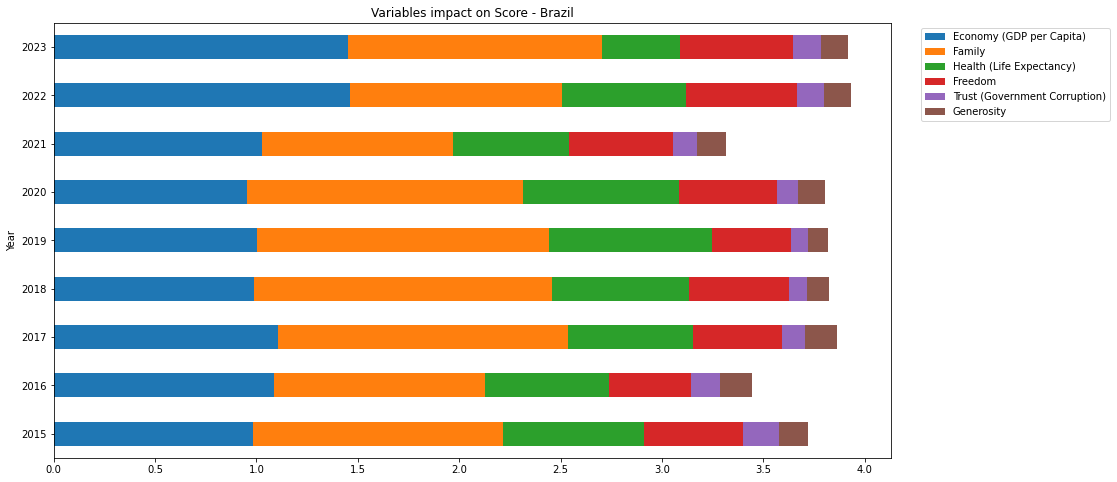

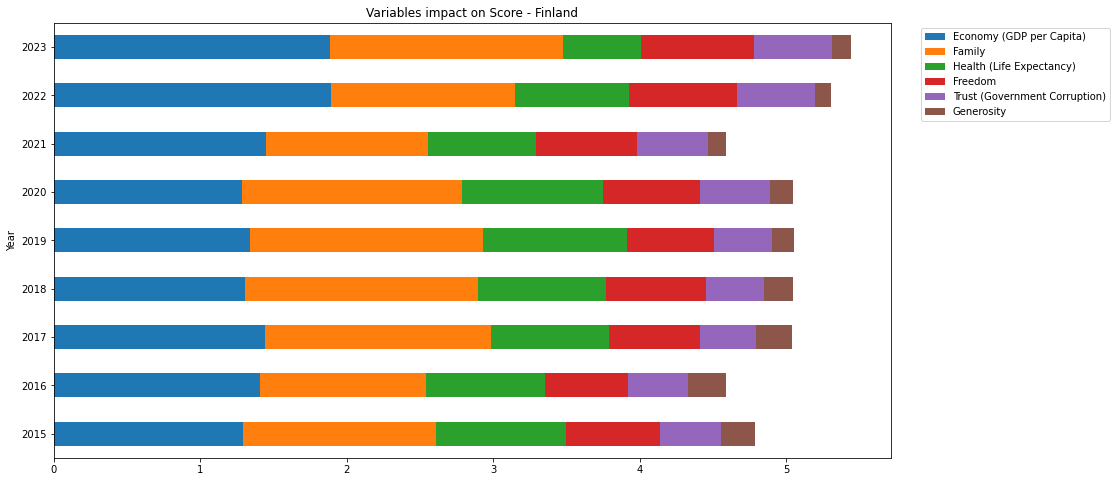

In [294]:
compare_country(df, ['Brazil', 'Finland'])

In [295]:
g8 = ['France', 'Germany', 'Italy', 'United Kingdom', 'Japan', 'United States', 'Canada', 'Russia']

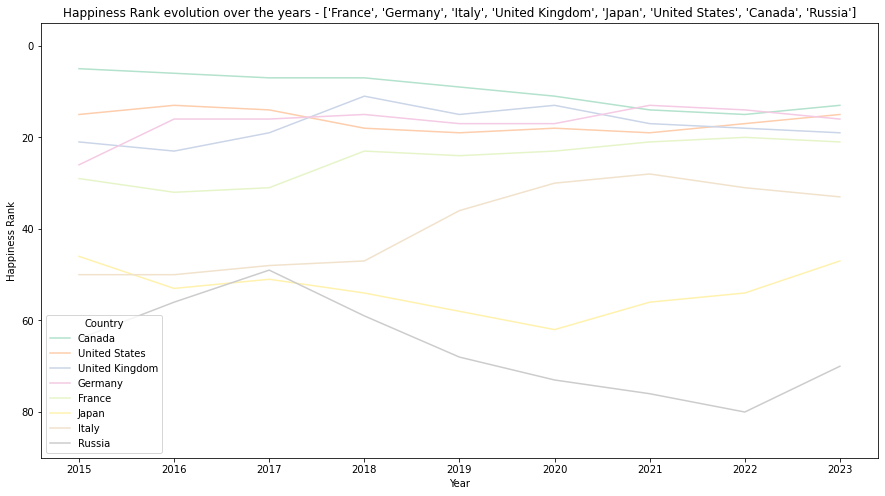

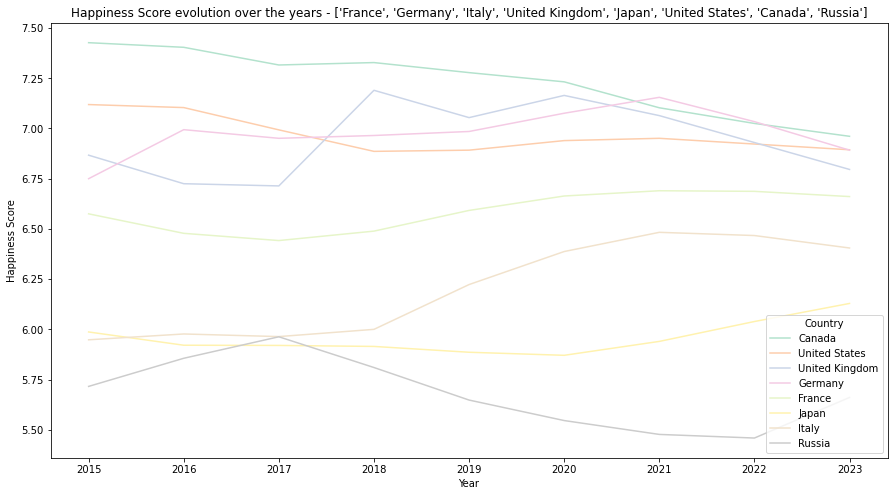

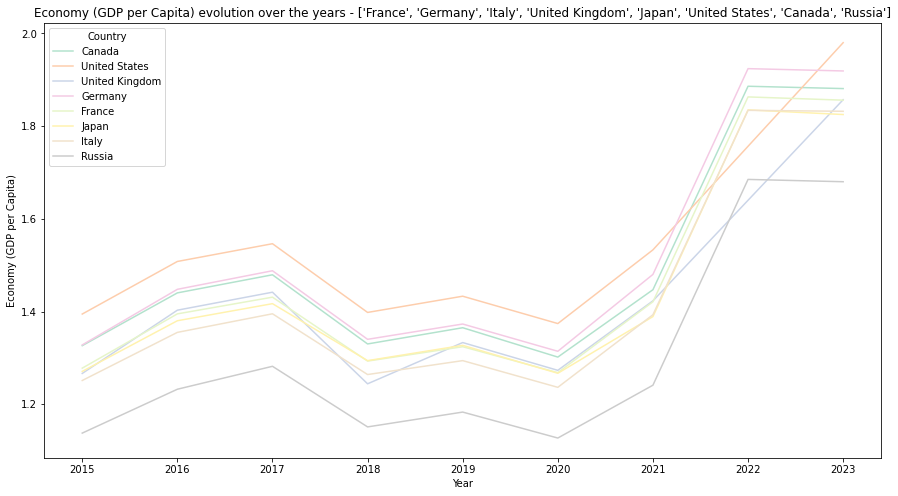

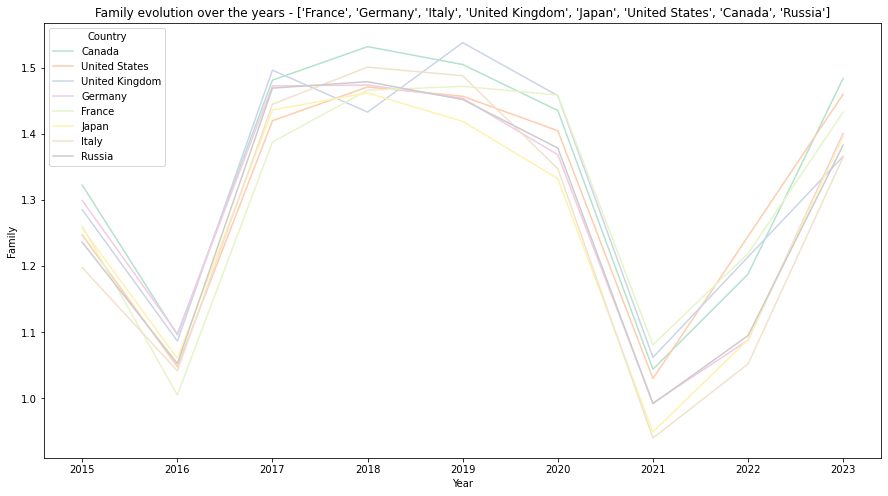

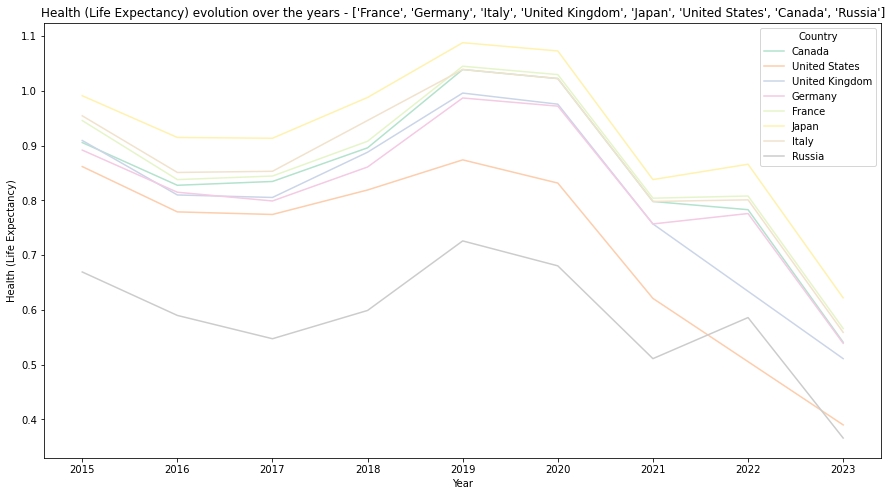

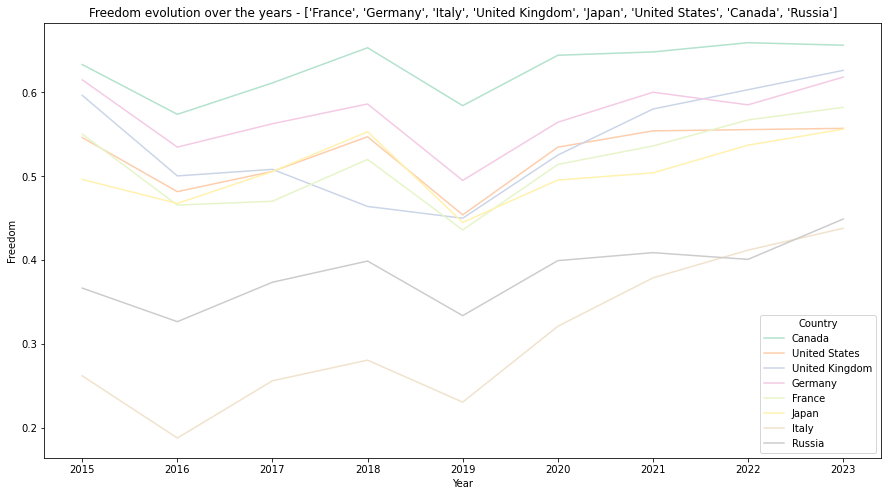

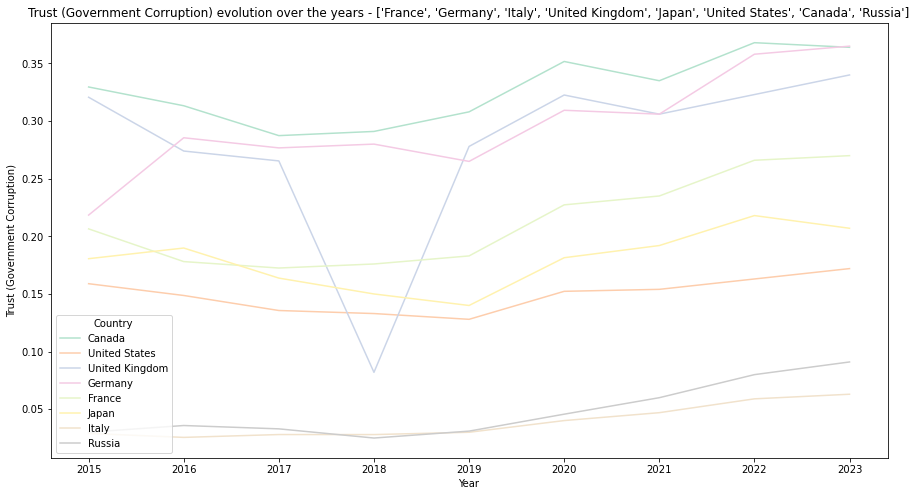

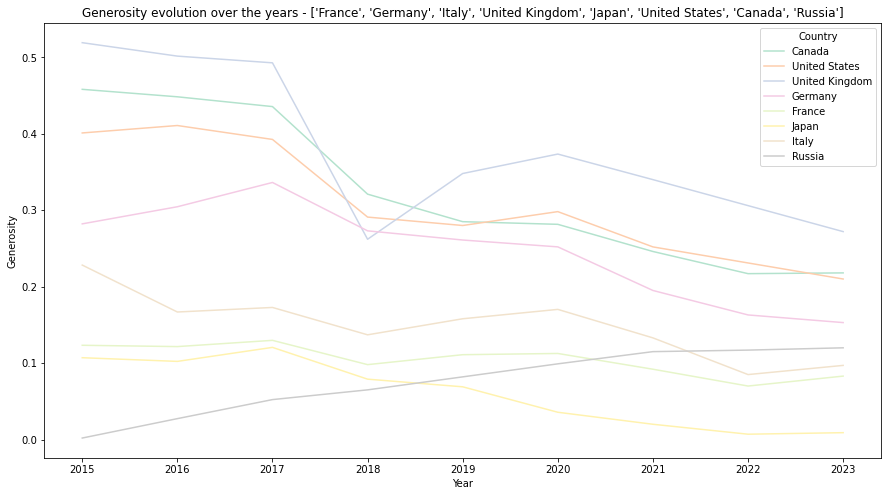

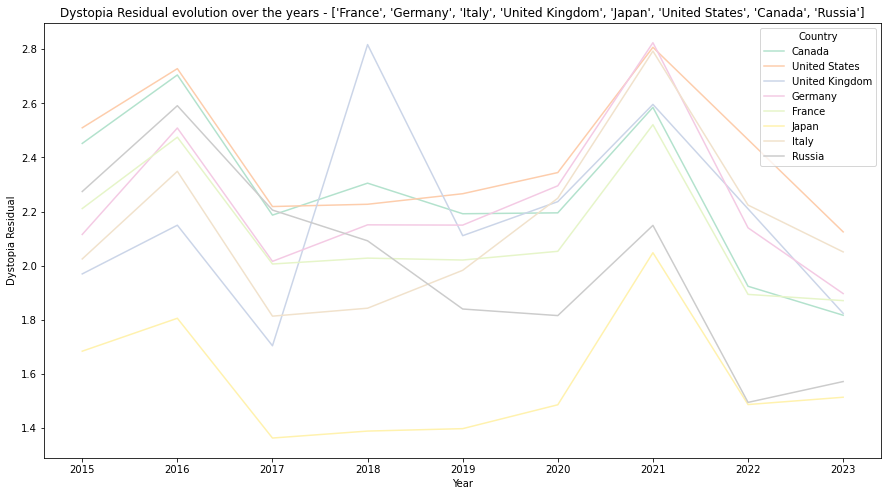

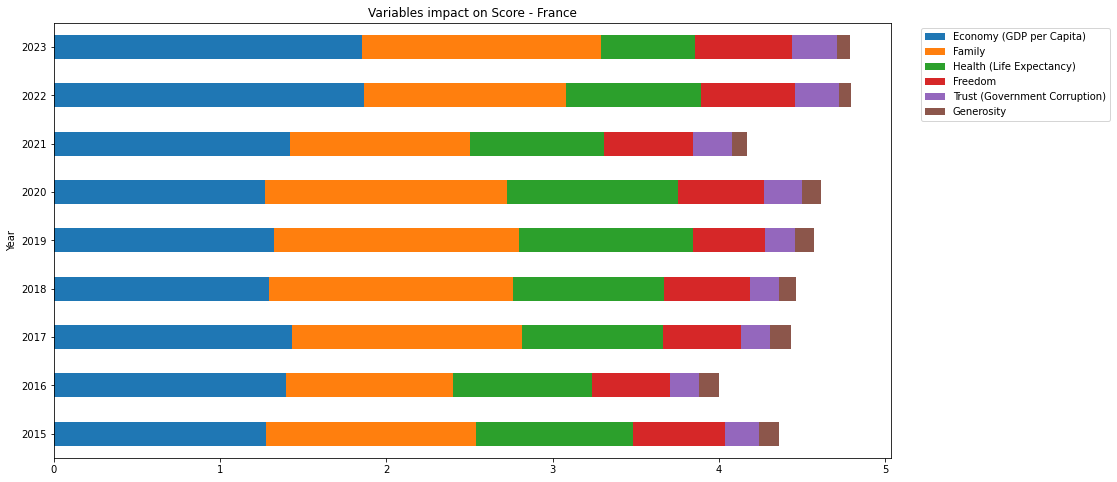

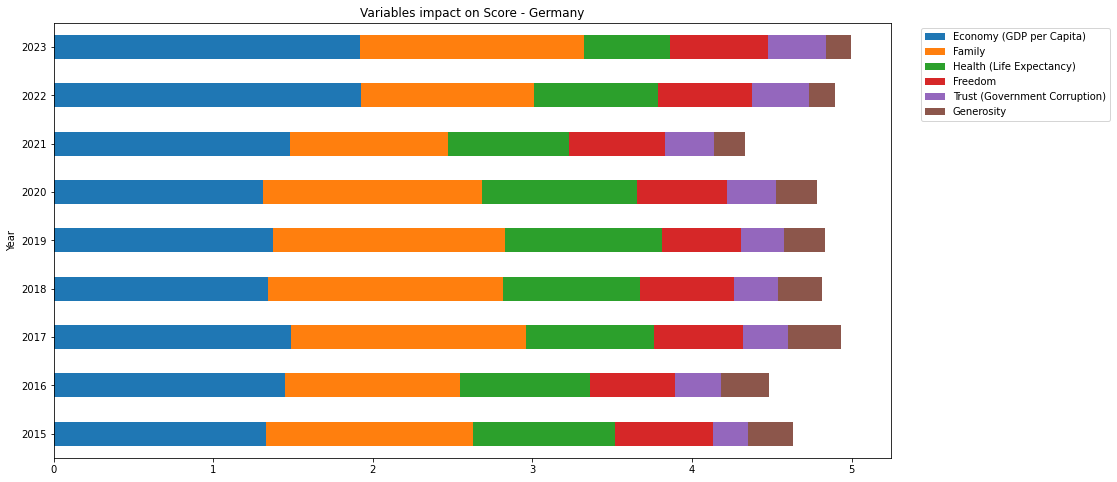

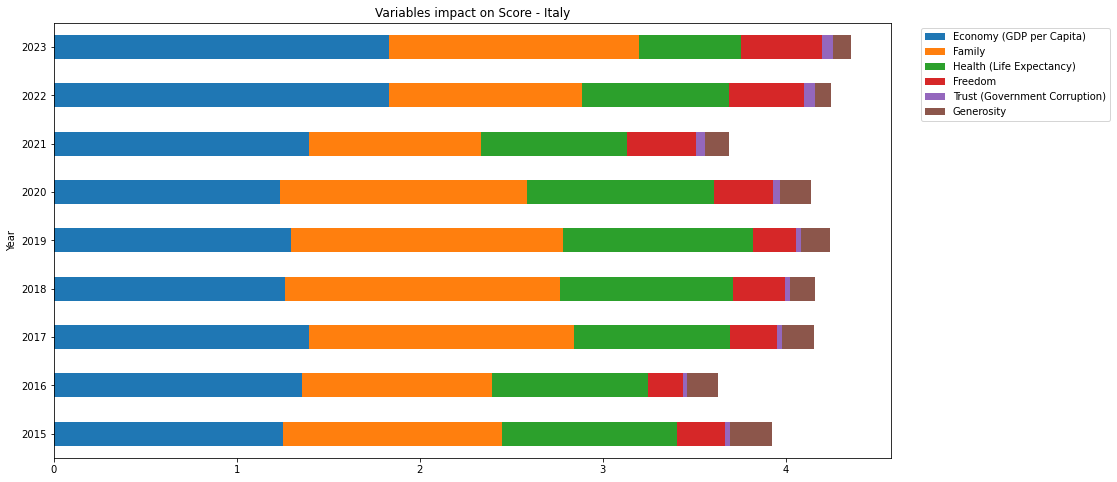

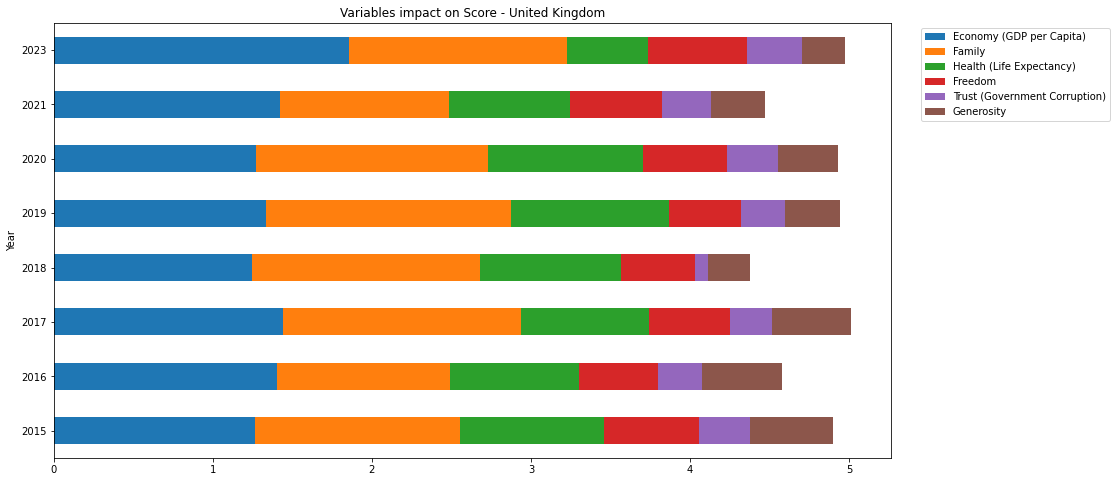

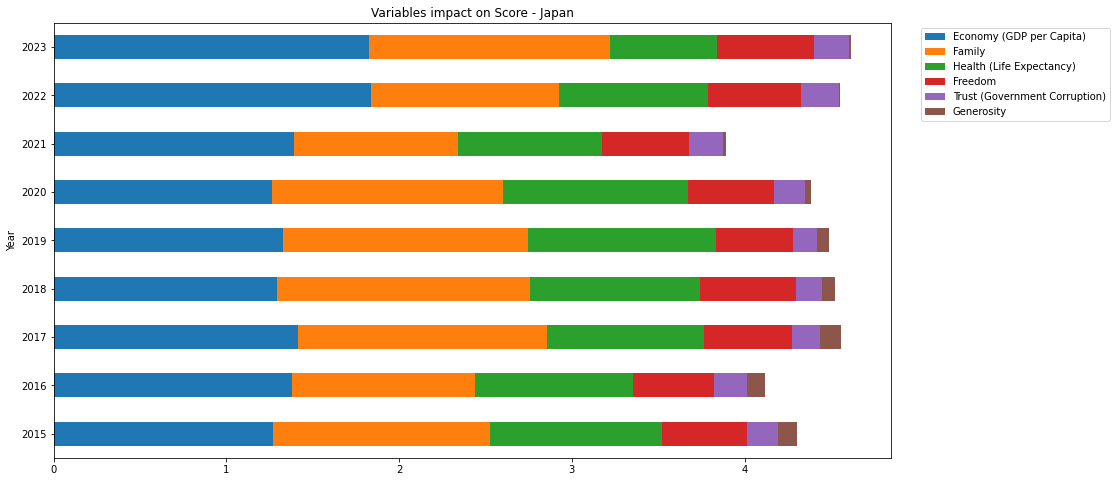

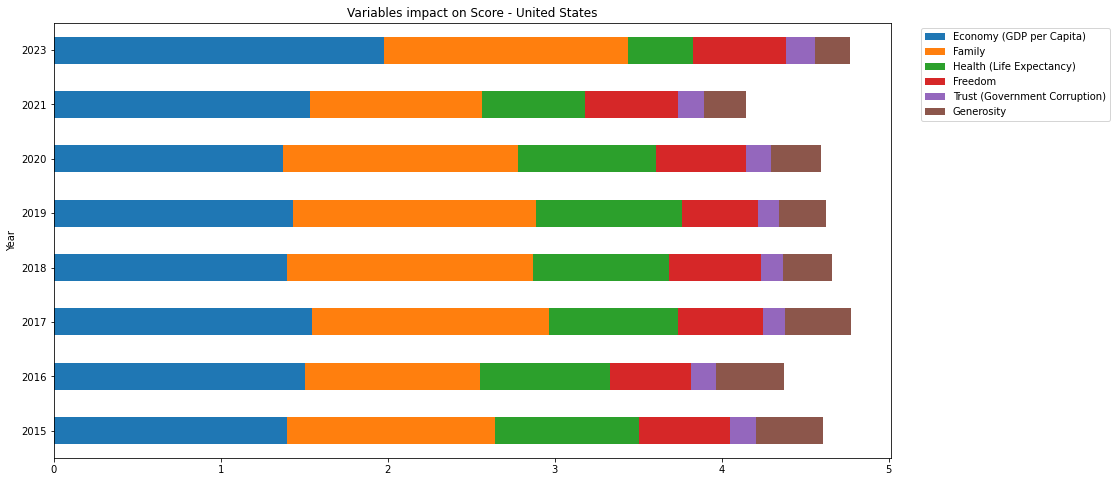

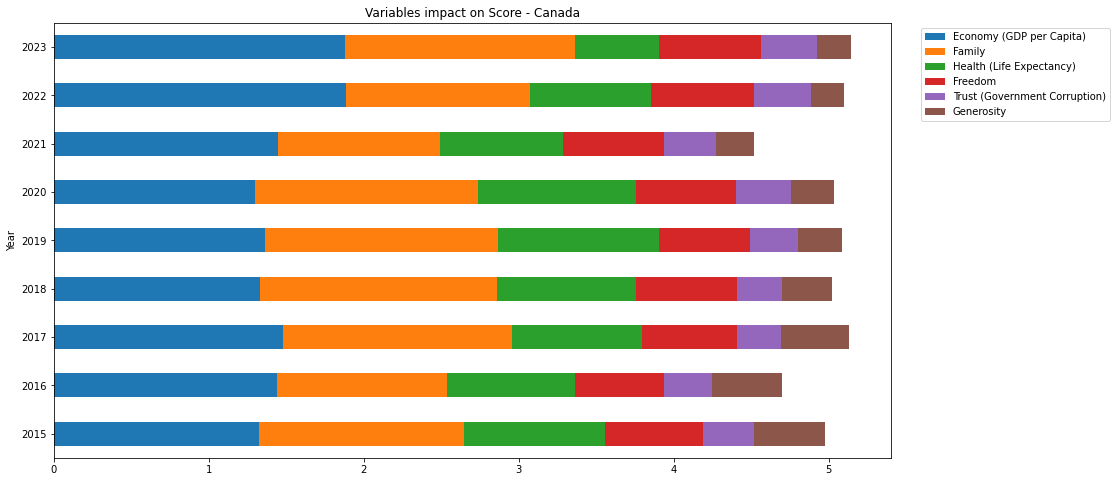

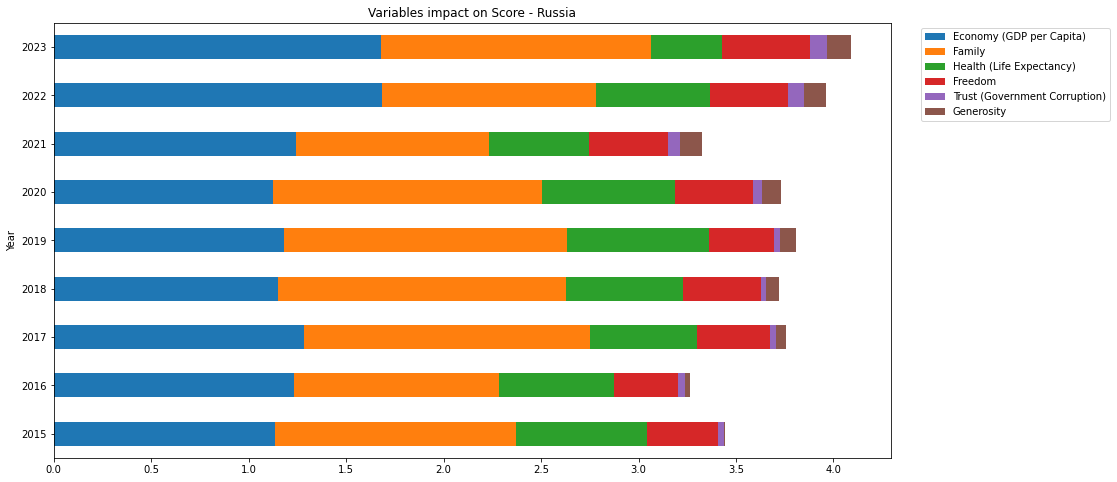

In [296]:
compare_country(df, g8)